In [1]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
import os
import seaborn as sns

font = {'family' : 'arial',
        'size'   : 18}

mpl.rc('font', **font)

import pickle
import pandas as pd
import numpy as np

fan_surface_df = pd.read_csv('fan_surface_slope_gs.csv')
fan_surface_by_fan = fan_surface_df.groupby('fan')

field_widths = pickle.load( open( "field_widths.p", "rb" ) )

# Fan Areas
HP_AREA = 66240278.4
GC_AREA = 11549089.64
SO1_AREA = 6463610.781
SO2_AREA = 9642230.604

areas = {
    'HP':HP_AREA,
    'GC':GC_AREA,
    'SO1':SO1_AREA,
    'SO2':SO2_AREA
}

In [2]:
# This step acheives the following;
# 1. Calculates a basal shear stresss (tb) using channel geometries and slopes 
# 2. Tests published 'tau_star' values with own estimates of t* to check densities and replicate results
# 3. Calculates Lamb et al., 2008 slope-mediated Crit Shields (tc_slope) , to the dataframe
# 4. Creates a ratio of t*/tc_slope
# 5. Calculates a representative D50 grains size using slope-mediated critical shields stress (tc_slope)

ps = 1680
pq = 2650 # Density of quartz (used in Stock et al., 2008)
pf = 1000
g = 9.81

def slope_tc(row):
    # Lamb et al., 2008
    
    #tau_m/tau_T = 40%
    
    P0 = -3.14
    P1 = 0.410
    P2 = 0.142
    P3 = 8.94e-2
    P4 = 2.59e-2
    
    X = 0.406*np.log(142*row['Slope (50-m)'])
    
    return np.exp((P4*np.power(X,4))+(P3*np.power(X,3))+(P2*np.power(X,2))+(P1*X)+P0)

def bed_shear_stress(row):
    return float(row['Slope (50-m)'])*float(row['R (m)'])*g*pf

def threshold_tc(row):
    return float(row['tb'])/((pq-pf)*g*(float(row['D_50 (mm)'])/1000))

def slope_D50(row):
    return (float(row['tb'])/((pq-pf)*g*row['tc_slope']))*1000

# Load data
fan_dv_2016 = pd.read_csv('Death_Valley_Surfaces/Field_Width_Depth_Data_DV_2016.csv')
fan_stock_et_al = pd.read_csv('stock_et_al_2008_all_fans.csv').dropna()
fan_stock_et_al['tb'] = fan_stock_et_al.apply(bed_shear_stress, axis=1)
fan_stock_et_al['t*'] = fan_stock_et_al.apply(threshold_tc, axis=1)
fan_stock_et_al['tc_slope'] = fan_stock_et_al.apply(slope_tc, axis=1)
fan_stock_et_al['tc_ratio'] = fan_stock_et_al['t*']/fan_stock_et_al['tc_slope']
fan_stock_et_al['slope_D50 (mm)'] = fan_stock_et_al.apply(slope_D50, axis=1)

print(fan_stock_et_al['tc_ratio'].median())

fan_stock_et_al.to_csv('fan_stock_et_al_processed.csv')
                 
fan_stock_et_al

7.205388575450844


Location  Sample  Total active width  x downfan (m)   w/d  \
0      Hanaupah       1                50.0           4990  16.0   
1      Hanaupah       2                50.0           4689  22.0   
2      Hanaupah       3                50.0           4584  36.0   
3      Hanaupah       4                50.0           4500  16.0   
4      Hanaupah       5                56.0           4015  14.0   
5      Hanaupah       6                84.0           3819  14.0   
6      Hanaupah       7                63.0           3672  11.0   
7      Hanaupah       8                77.0           3500  17.0   
8      Hanaupah       9                77.0           3105  34.0   
9      Hanaupah      10                49.0           2636  25.0   
11    Lucy Gray       1               400.0           7545  47.0   
12    Lucy Gray       2               340.0           7035  57.0   
13    Lucy Gray       3               610.0           6195  44.0   
14    Lucy Gray       4               550.0           5495  31.0   
15    Lucy Gray       5               420.0           4840  35.0   
16    Lucy Gray       6               390.0           4280  24.0   
17    Lucy Gray       7               330.0           3705  45.0   
18    Lucy Gray       8               180.0           3225  68.0   
19    Lucy Gray       9               180.0           2755  17.0   
20    Lucy Gray      10               140.0           2260  23.0   
21    Lucy Gray      11               140.0           1805  43.0   
22    Lucy Gray      12               180.0           1355  26.0   
23    Lucy Gray      13                80.0            915  46.0   
24    Lucy Gray      14                70.0            445  81.0   
25    Lucy Gray      15               130.0              0  72.0   
26        Globe       1                50.0           7290  30.0   
27        Globe       2                50.0           6294  20.0   
28        Globe       3                50.0           5502  34.0   
29        Globe       4                80.0           4860  46.0   
30        Globe       5                60.0           4284  19.0   
31        Globe       6                70.0           4098  80.0   
32        Globe       7                50.0           3708  43.0   
33        Globe       8                65.0           3342  35.0   
34        Globe       9                70.0           2904  65.0   
35        Globe      10                80.0           2544  46.0   
36        Globe      11                70.0           2010  72.0   
37        Globe      12                70.0           1866  82.0   
38        Globe      13                50.0           1500  56.0   
39        Globe      14                80.0           1158  58.0   
40        Globe      15                60.0            786  59.0   
42        Globe      17               100.0              0  65.0   
50  Sheep Creek       1                49.0           5286  27.0   
51  Sheep Creek       2                28.0           5010  18.0   
52  Sheep Creek       3                28.0           4770  33.0   
53  Sheep Creek       4                42.0           4380  37.0   
54  Sheep Creek       5                35.0           4014  28.0   
55  Sheep Creek       6                49.0           3612  21.0   
56  Sheep Creek       7                20.0           3096  11.0   
57  Sheep Creek       8                35.0           2982  16.0   
58  Sheep Creek       9                28.0           2574  41.0   
59  Sheep Creek      10                49.0           2280  19.0   
60  Sheep Creek      11                35.0           1962  30.0   
61  Sheep Creek      12                35.0           1650  21.0   
62  Sheep Creek      13                20.0           1404  27.0   
63  Sheep Creek      14                20.0           1062  14.0   
64  Sheep Creek      15                49.0            822  31.0   
65  Sheep Creek      16                21.0            534  20.0   
66  Sheep Creek      17                56.0            288  40.

In [3]:
# This step acheives the following;
# 1. Calculates hydraulic radius for Q4 surfaces on each fan 
# 2. Calculates a basal shear stresss (tb) using channel geometries and slopes 
# 3. Tests published 'tau_star' values with own estimates of t* to check densities and replicate results
# 4. Calculates Lamb et al., 2008 slope-mediated Crit Shields (tc_slope) , to the dataframe
# 5. Creates a ratio of t*/tc_slope
# 6. Calculates a representative D50 grain size using slope-mediated critical shields stress (tc_slope)
# 7. Calculates a representative basal shear stresss using corrected (tc_slope*tc_ratio) critical shields stress

ps = 1680
pq = 2650 # Density of quartz (used in Stock et al., 2008)
pf = 1000
g = 9.81


def slope_tc(row):
    # Lamb et al., 2008
    
    #tau_m/tau_T = 40%
    
    P0 = -3.14
    P1 = 0.410
    P2 = 0.142
    P3 = 8.94e-2
    P4 = 2.59e-2
    
    X = 0.406*np.log(142*row['Slope'])
    
    return np.exp((P4*np.power(X,4))+(P3*np.power(X,3))+(P2*np.power(X,2))+(P1*X)+P0)

def hydraulic_radius(row):
    A = float(row['Wbf'])*float(row['Hbf'])
    P = float(row['Wbf']+row['Hbf']+row['Hbf'])
    return A/P

def bed_shear_stress(row):
    return float(row['Slope'])*float(row['R'])*g*pf

def threshold_tc(row):
    return float(row['tb'])/((pq-pf)*g*(float(row['D50'])/1000))

def slope_D50(row):
    return (float(row['tb'])/((pq-pf)*g*row['tc_slope']))*1000


HP_Q4_geom_gs = pd.read_csv('Death_Valley_Surfaces/grain_size_with_channel_geometry_Q4/HP_Q4.csv')
HP_Q4_geom_gs['R'] = HP_Q4_geom_gs.apply(hydraulic_radius, axis=1)
HP_Q4_geom_gs['tb'] = HP_Q4_geom_gs.apply(bed_shear_stress, axis=1)
HP_Q4_geom_gs['t*'] = HP_Q4_geom_gs.apply(threshold_tc, axis=1)
HP_Q4_geom_gs['tc_slope'] = HP_Q4_geom_gs.apply(slope_tc, axis=1)
HP_Q4_geom_gs['tc_ratio'] = HP_Q4_geom_gs['t*']/HP_Q4_geom_gs['tc_slope']
HP_Q4_geom_gs['slope_D50 (mm)'] = HP_Q4_geom_gs.apply(slope_D50, axis=1)
HP_Q4_geom_gs['distance_norm'] = HP_Q4_geom_gs['distance']/HP_Q4_geom_gs['distance'].max()

GC_Q4_geom_gs = pd.read_csv('Death_Valley_Surfaces/grain_size_with_channel_geometry_Q4/GC_Q4.csv')
GC_Q4_geom_gs['R'] = GC_Q4_geom_gs.apply(hydraulic_radius, axis=1)
GC_Q4_geom_gs['tb'] = GC_Q4_geom_gs.apply(bed_shear_stress, axis=1)
GC_Q4_geom_gs['t*'] = GC_Q4_geom_gs.apply(threshold_tc, axis=1)
GC_Q4_geom_gs['tc_slope'] = GC_Q4_geom_gs.apply(slope_tc, axis=1)
GC_Q4_geom_gs['tc_ratio'] = GC_Q4_geom_gs['t*']/GC_Q4_geom_gs['tc_slope']
GC_Q4_geom_gs['slope_D50 (mm)'] = GC_Q4_geom_gs.apply(slope_D50, axis=1)
GC_Q4_geom_gs['distance_norm'] = GC_Q4_geom_gs['distance']/GC_Q4_geom_gs['distance'].max()

SO1_Q4_geom_gs = pd.read_csv('Death_Valley_Surfaces/grain_size_with_channel_geometry_Q4/SO1_Q4.csv')
SO1_Q4_geom_gs['R'] = SO1_Q4_geom_gs.apply(hydraulic_radius, axis=1)
SO1_Q4_geom_gs['tb'] = SO1_Q4_geom_gs.apply(bed_shear_stress, axis=1)
SO1_Q4_geom_gs['t*'] = SO1_Q4_geom_gs.apply(threshold_tc, axis=1)
SO1_Q4_geom_gs['tc_slope'] = SO1_Q4_geom_gs.apply(slope_tc, axis=1)
SO1_Q4_geom_gs['tc_ratio'] = SO1_Q4_geom_gs['t*']/SO1_Q4_geom_gs['tc_slope']
SO1_Q4_geom_gs['slope_D50 (mm)'] = SO1_Q4_geom_gs.apply(slope_D50, axis=1)
SO1_Q4_geom_gs['distance_norm'] = SO1_Q4_geom_gs['distance']/SO1_Q4_geom_gs['distance'].max()

SO2_Q4_geom_gs = pd.read_csv('Death_Valley_Surfaces/grain_size_with_channel_geometry_Q4/SO2_Q4.csv')
SO2_Q4_geom_gs['R'] = SO2_Q4_geom_gs.apply(hydraulic_radius, axis=1)
SO2_Q4_geom_gs['tb'] = SO2_Q4_geom_gs.apply(bed_shear_stress, axis=1)
SO2_Q4_geom_gs['t*'] = SO2_Q4_geom_gs.apply(threshold_tc, axis=1)
SO2_Q4_geom_gs['tc_slope'] = SO2_Q4_geom_gs.apply(slope_tc, axis=1)
SO2_Q4_geom_gs['tc_ratio'] = SO2_Q4_geom_gs['t*']/SO2_Q4_geom_gs['tc_slope']
SO2_Q4_geom_gs['slope_D50 (mm)'] = SO2_Q4_geom_gs.apply(slope_D50, axis=1)
SO2_Q4_geom_gs['slope_D50 (mm)'] = SO2_Q4_geom_gs.apply(slope_D50, axis=1)
SO2_Q4_geom_gs['distance_norm'] = SO2_Q4_geom_gs['distance']/SO2_Q4_geom_gs['distance'].max()

fan_dv_2016_tc_df = HP_Q4_geom_gs.append(GC_Q4_geom_gs).append(SO1_Q4_geom_gs).append(SO2_Q4_geom_gs)

print(fan_dv_2016_tc_df)


    Fan  Site   Wbf   Hbf     Slope Surface site_names     latitude  \
0    HP   A-1  15.3  1.70  0.094528      Q4     HP-A-1  503554.9974   
1    HP   A-1   6.7  0.40  0.096289      Q4     HP-A-1  503554.9974   
2    HP   A-2  40.2   NaN  0.089248      Q4     HP-A-2  504274.9701   
3    HP   A-2   7.2  0.60  0.091007      Q4     HP-A-2  504274.9701   
4    HP   A-7  20.0  0.45  0.073435      Q4     HP-A-7  504967.9199   
..  ...   ...   ...   ...       ...     ...        ...          ...   
10  SO2  4-11  30.3  0.30  0.073435      Q4   SO2-4-10  525874.4070   
11  SO2  4-12   8.1  0.60  0.071681      Q4    SO2-4-9  525615.4062   
12  SO2  4-13  20.4  0.50  0.066420      Q4    SO2-4-8  525382.6810   
13  SO2  4-14  12.9  0.40  0.066420      Q4    SO2-4-7  525129.7865   
14  SO2  4-15   4.3  0.30  0.045410      Q4   SO2-4-15  524878.7622   

      longitude     distance  ...    D84    D90         R           tb  \
0   4006986.655  1669.875038  ...  109.5  125.5  1.390909  1289.817373   

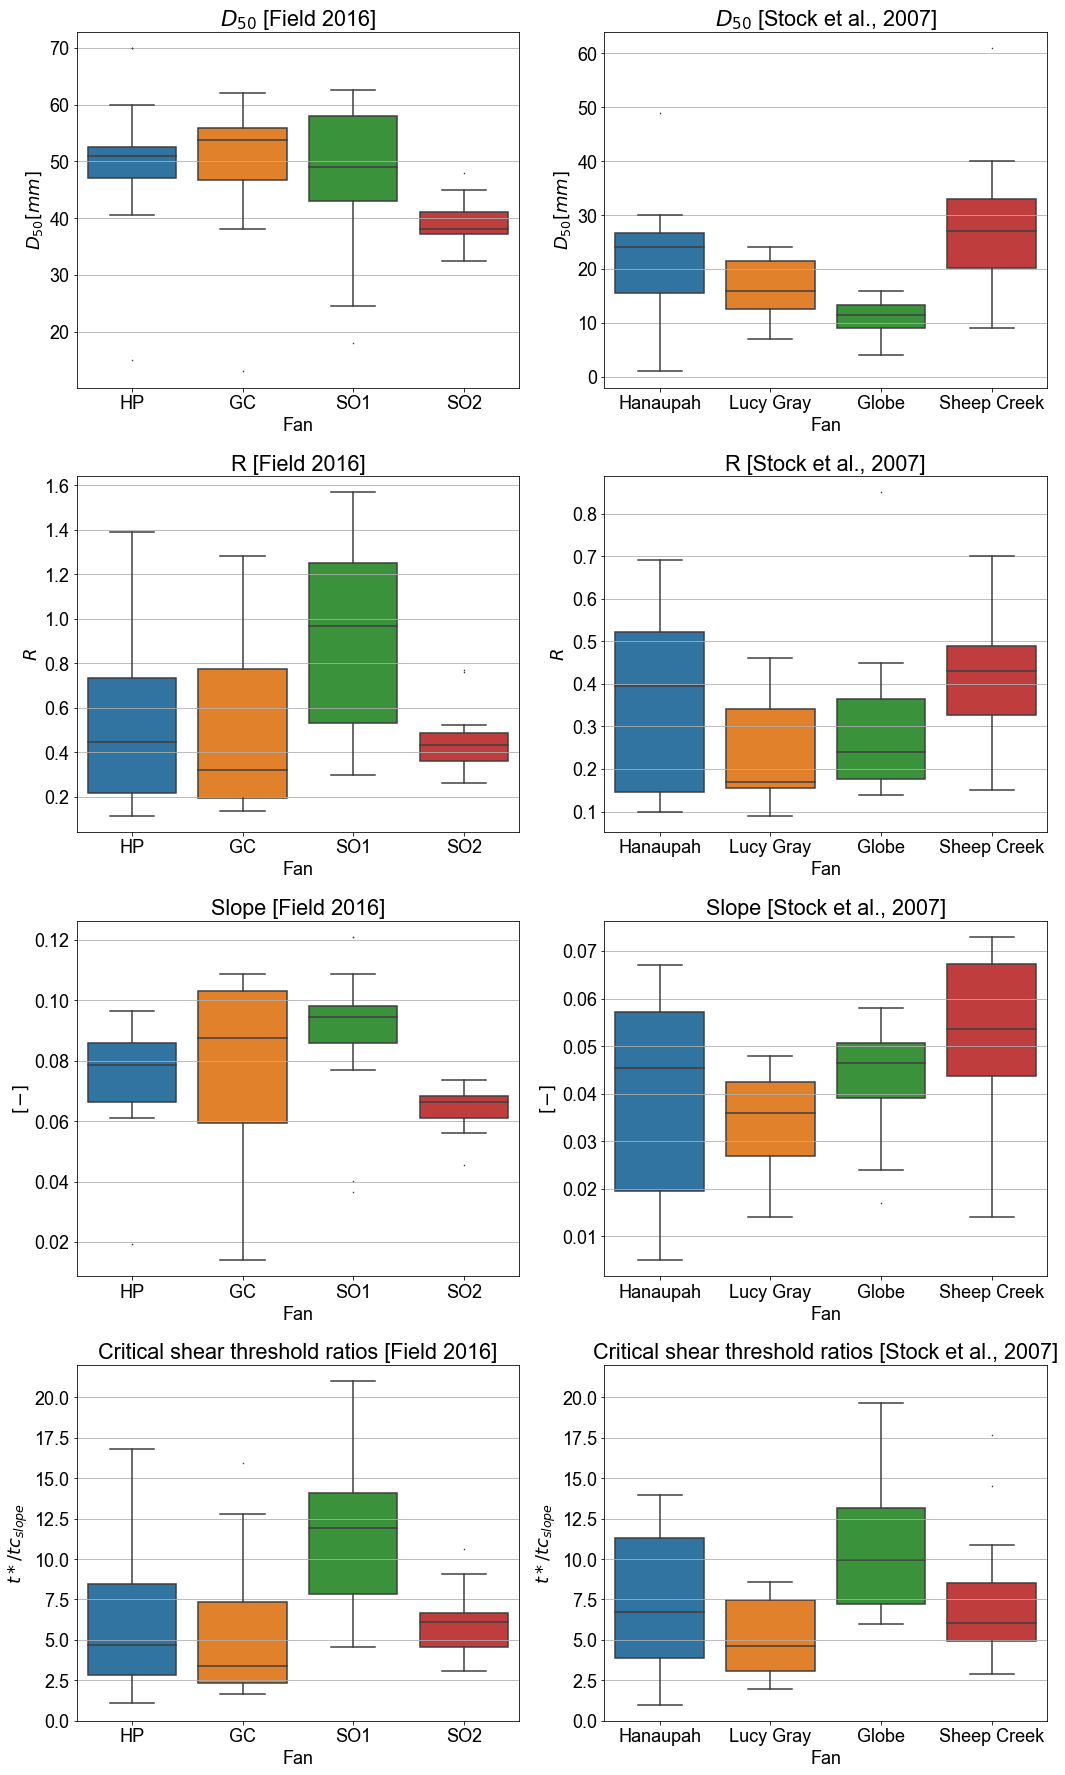

In [4]:
# Active Channel -- Field 2016 vs Stock et al., 2007 comparison

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,25))

# D50
sns.boxplot(x="Fan", y="D50", data=fan_dv_2016_tc_df, fliersize=0.7, ax=ax[0][0])
ax[0][0].set_ylabel('$D_{50} [mm]$')
ax[0][0].set_xlabel('Fan')
ax[0][0].set_title(r"$D_{50}$ [Field 2016]")
ax[0][0].grid(axis='y')
# ax[0][0].set_ylim([0, 22])

sns.boxplot(x="Location", y="D_50 (mm)", data=fan_stock_et_al, fliersize=0.7, ax=ax[0][1])
ax[0][1].set_ylabel('$D_{50} [mm]$')
ax[0][1].set_xlabel('Fan')
ax[0][1].set_title(r"$D_{50}$ [Stock et al., 2007]")
ax[0][1].grid(axis='y')
# ax[0][1].set_ylim([0, 22])

# R
sns.boxplot(x="Fan", y="R", data=fan_dv_2016_tc_df, fliersize=0.7, ax=ax[1][0])
ax[1][0].set_ylabel('$R$')
ax[1][0].set_xlabel('Fan')
ax[1][0].set_title(r"R [Field 2016]")
ax[1][0].grid(axis='y')
# ax[0][0].set_ylim([0, 22])

sns.boxplot(x="Location", y="R (m)", data=fan_stock_et_al, fliersize=0.7, ax=ax[1][1])
ax[1][1].set_ylabel('$R$')
ax[1][1].set_xlabel('Fan')
ax[1][1].set_title(r"R [Stock et al., 2007]")
ax[1][1].grid(axis='y')
# ax[0][1].set_ylim([0, 22])

# Slope
sns.boxplot(x="Fan", y="Slope", data=fan_dv_2016_tc_df, fliersize=0.7, ax=ax[2][0])
ax[2][0].set_ylabel('$[-]$')
ax[2][0].set_xlabel('Fan')
ax[2][0].set_title(r"Slope [Field 2016]")
ax[2][0].grid(axis='y')
# ax[0][0].set_ylim([0, 22])

sns.boxplot(x="Location", y="Slope (50-m)", data=fan_stock_et_al, fliersize=0.7, ax=ax[2][1])
ax[2][1].set_ylabel('$[-]$')
ax[2][1].set_xlabel('Fan')
ax[2][1].set_title(r"Slope [Stock et al., 2007]")
ax[2][1].grid(axis='y')
# ax[0][1].set_ylim([0, 22])

# TC Ratio

sns.boxplot(x="Fan", y="tc_ratio", data=fan_dv_2016_tc_df, fliersize=0.7, ax=ax[3][0])
ax[3][0].set_ylabel('$t*/tc_{slope}$')
ax[3][0].set_xlabel('Fan')
ax[3][0].set_title(r"Critical shear threshold ratios [Field 2016]")
ax[3][0].grid(axis='y')
ax[3][0].set_ylim([0, 22])

sns.boxplot(x="Location", y="tc_ratio", data=fan_stock_et_al, fliersize=0.7, ax=ax[3][1])
ax[3][1].set_ylabel('$t*/tc_{slope}$')
ax[3][1].set_xlabel('Fan')
ax[3][1].set_title(r"Critical shear threshold ratios [Stock et al., 2007]")
ax[3][1].grid(axis='y')
ax[3][1].set_ylim([0, 22])

plt.tight_layout()
plt.show()

In [5]:
fan_dv_2016_tc_df

Fan  Site   Wbf   Hbf     Slope Surface site_names     latitude  \
0    HP   A-1  15.3  1.70  0.094528      Q4     HP-A-1  503554.9974   
1    HP   A-1   6.7  0.40  0.096289      Q4     HP-A-1  503554.9974   
2    HP   A-2  40.2   NaN  0.089248      Q4     HP-A-2  504274.9701   
3    HP   A-2   7.2  0.60  0.091007      Q4     HP-A-2  504274.9701   
4    HP   A-7  20.0  0.45  0.073435      Q4     HP-A-7  504967.9199   
..  ...   ...   ...   ...       ...     ...        ...          ...   
10  SO2  4-11  30.3  0.30  0.073435      Q4   SO2-4-10  525874.4070   
11  SO2  4-12   8.1  0.60  0.071681      Q4    SO2-4-9  525615.4062   
12  SO2  4-13  20.4  0.50  0.066420      Q4    SO2-4-8  525382.6810   
13  SO2  4-14  12.9  0.40  0.066420      Q4    SO2-4-7  525129.7865   
14  SO2  4-15   4.3  0.30  0.045410      Q4   SO2-4-15  524878.7622   

      longitude     distance  ...    D84    D90         R           tb  \
0   4006986.655  1669.875038  ...  109.5  125.5  1.390909  1289.817373   
1   4006986.655  1669.875038  ...  109.5  125.5  0.357333   337.535312   
2   4007092.574  2397.119552  ...   96.0  126.5       NaN          NaN   
3   4007092.574  2397.119552  ...   96.0  126.5  0.514286   459.143316   
4   4007266.974  3110.320599  ...   93.0  105.0  0.430622   310.218955   
..          ...          ...  ...    ...    ...       ...          ...   
10  3979240.031  2284.557146  ...   72.5   81.5  0.294175   211.922716   
11  3979274.879  2512.882543  ...   64.5   77.0  0.522581   367.473803   
12  3979361.157  2706.933825  ...   69.0   79.0  0.476636   310.566264   
13  3979375.408  2946.521366  ...   67.0   84.0  0.376642   245.412688   
14  3979430.150  3177.210766  ...   81.5   92.0  0.263265   117.277349   

          t*  tc_slope   tc_ratio  slope_D50 (mm)  distance_norm  Unnamed: 6  
0   1.503486  0.089542  16.790896      889.917513       0.178113         NaN  
1   0.393451  0.090306   4.356881      230.914718       0.178113         NaN  
2        NaN  0.087242        NaN             NaN       0.255682         NaN  
3   0.472764  0.088010   5.371728      322.303692       0.255682         NaN  
4   0.368563  0.080241   4.593212      238.847025       0.331754         NaN  
..       ...       ...        ...             ...            ...         ...  
10  0.319331  0.080241   3.979653      163.165756       0.719045         NaN  
11  0.687954  0.079451   8.658808      285.740679       0.790908         NaN  
12  0.511647  0.077064   6.639255      248.972046       0.851984         NaN  
13  0.421155  0.077064   5.465008      196.740298       0.927392         NaN  
14  0.222935  0.067124   3.321238      107.940241       1.000000         NaN  

[83 rows x 25 columns]

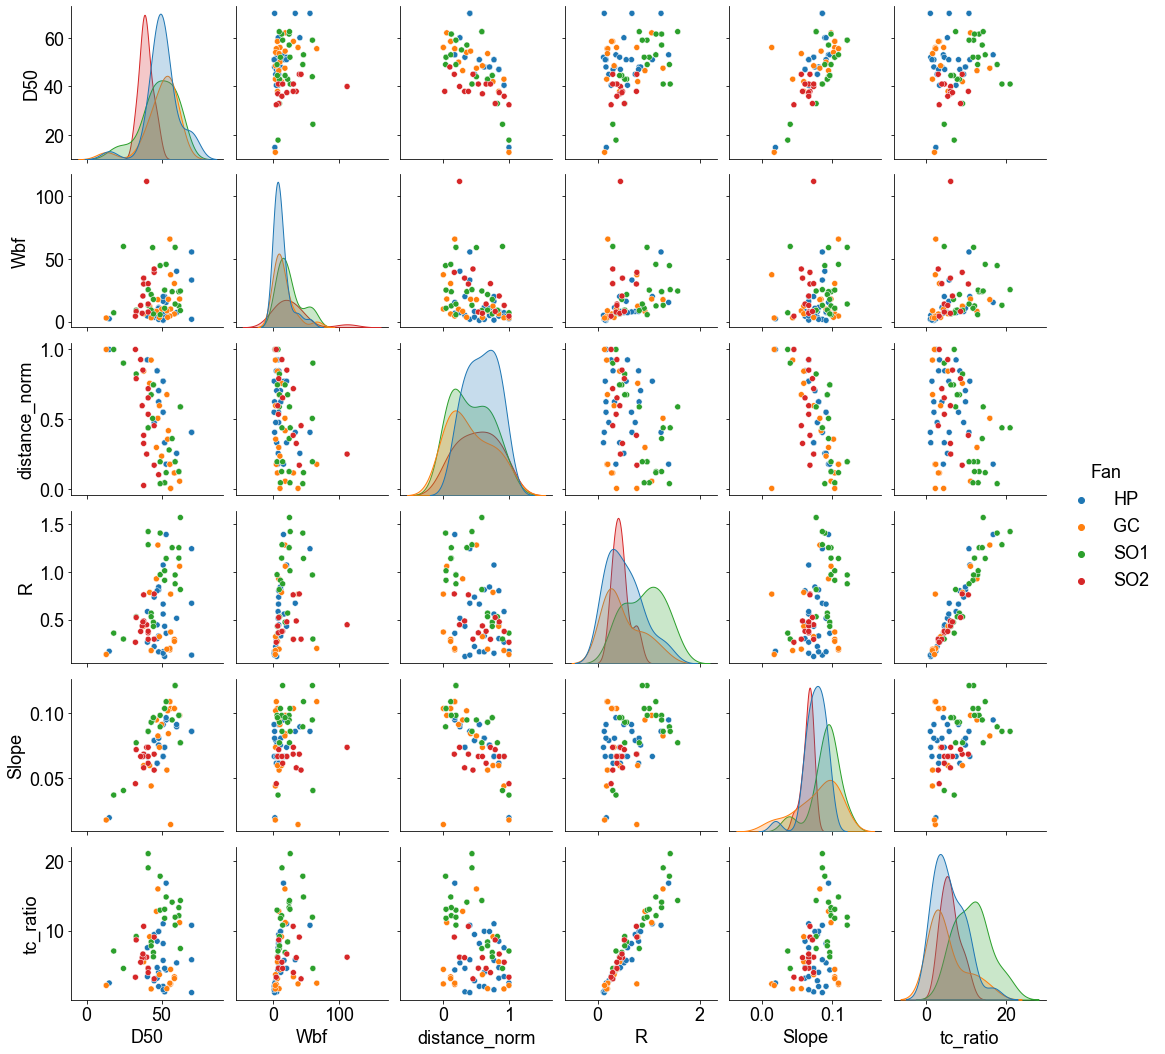

In [6]:
sns.pairplot(fan_dv_2016_tc_df, hue="Fan", vars=['D50', 'Wbf', 'distance_norm', 'R', 'Slope', 'tc_ratio'])


In [7]:
# TC ratios, compare field 2016 vs. Stock et al., 2007

tc_ratio_2016 = fan_dv_2016_tc_df['tc_ratio']
tc_ratio_2016_fan = fan_dv_2016_tc_df['Fan']
tc_ratio_Stock = fan_stock_et_al['tc_ratio']
tc_ratio_Stock_fan = fan_stock_et_al['Location']

print(len(tc_ratio_2016))
print(len(tc_ratio_Stock))

tc_ratio_median_2016 = fan_dv_2016_tc_df['tc_ratio'].quantile(.5)
tc_ratio_25_2016 = fan_dv_2016_tc_df['tc_ratio'].quantile(.25)
tc_ratio_75_2016 = fan_dv_2016_tc_df['tc_ratio'].quantile(.75)

print(tc_ratio_median_2016)
print(tc_ratio_25_2016)
print(tc_ratio_75_2016)

tc_ratio_median_stock = fan_stock_et_al['tc_ratio'].quantile(.5)
tc_ratio_25_stock = fan_stock_et_al['tc_ratio'].quantile(.25)
tc_ratio_75_stock = fan_stock_et_al['tc_ratio'].quantile(.75)

print(tc_ratio_median_stock)
print(tc_ratio_25_stock)
print(tc_ratio_75_stock)



df_tc_ratio = pd.DataFrame({'tc_ratio': tc_ratio_Stock.values, 'fan': tc_ratio_Stock_fan.values})
df_tc_ratio['Study'] = 'Stock et al., 2007'

df_tc_ratio_2 = pd.DataFrame({'tc_ratio': tc_ratio_2016.values, 'fan': tc_ratio_2016_fan.values})
df_tc_ratio_2['Study'] = 'This Study'
df_tc_ratio = df_tc_ratio.append(df_tc_ratio_2)

fig.savefig('figures/tc_ratios.pdf')



83
59
6.214170119576389
3.4755886556390965
10.718701642440717
7.205388575450844
4.532735880855066
9.977222998672307


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


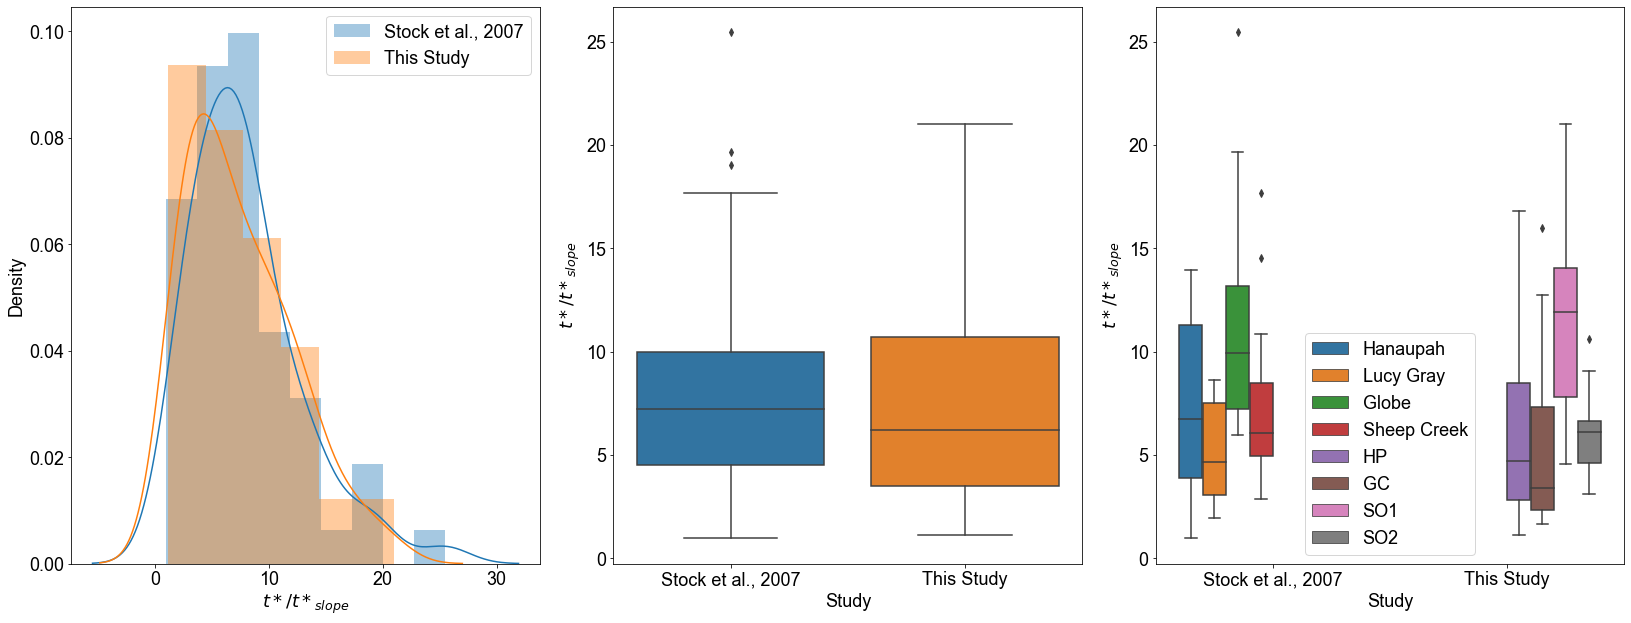

tc_ratio       fan               Study
0   10.350613  Hanaupah  Stock et al., 2007
1    4.069252  Hanaupah  Stock et al., 2007
2    1.684260  Hanaupah  Stock et al., 2007
3    0.962726  Hanaupah  Stock et al., 2007
4    4.548932  Hanaupah  Stock et al., 2007
..        ...       ...                 ...
78   3.979653       SO2          This Study
79   8.658808       SO2          This Study
80   6.639255       SO2          This Study
81   5.465008       SO2          This Study
82   3.321238       SO2          This Study

[142 rows x 3 columns]

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(23,9))
sns.distplot(tc_ratio_Stock, ax=ax[0], label='Stock et al., 2007')
sns.distplot(tc_ratio_2016, ax=ax[0], label='This Study')
ax[0].legend()
ax[0].set_xlabel("$t*/t*_{slope}$")

sns.boxplot(data=df_tc_ratio, x='Study', y='tc_ratio', ax=ax[1])
ax[1].set_ylabel("$t*/t*_{slope}$")

sns.boxplot(data=df_tc_ratio, x='Study', y='tc_ratio', hue='fan', ax=ax[2])
ax[2].legend()
ax[2].set_ylabel("$t*/t*_{slope}$")
plt.tight_layout()
plt.show()

df_tc_ratio

In [9]:
# Use combined values to act as range of tc_ratios
tc_ratio_median = df_tc_ratio['tc_ratio'].quantile(.5)
tc_ratio_25 = df_tc_ratio['tc_ratio'].quantile(.25)
tc_ratio_75 = df_tc_ratio['tc_ratio'].quantile(.75)

print('tc_ratio median: ' +str(tc_ratio_median))
print('tc_ratio pct 25: ' +str(tc_ratio_25))
print('tc_ratio pct 75: ' +str(tc_ratio_75))


tc_ratio median: 6.872578959919161
tc_ratio pct 25: 3.979652574747419
tc_ratio pct 75: 10.350613394097014


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


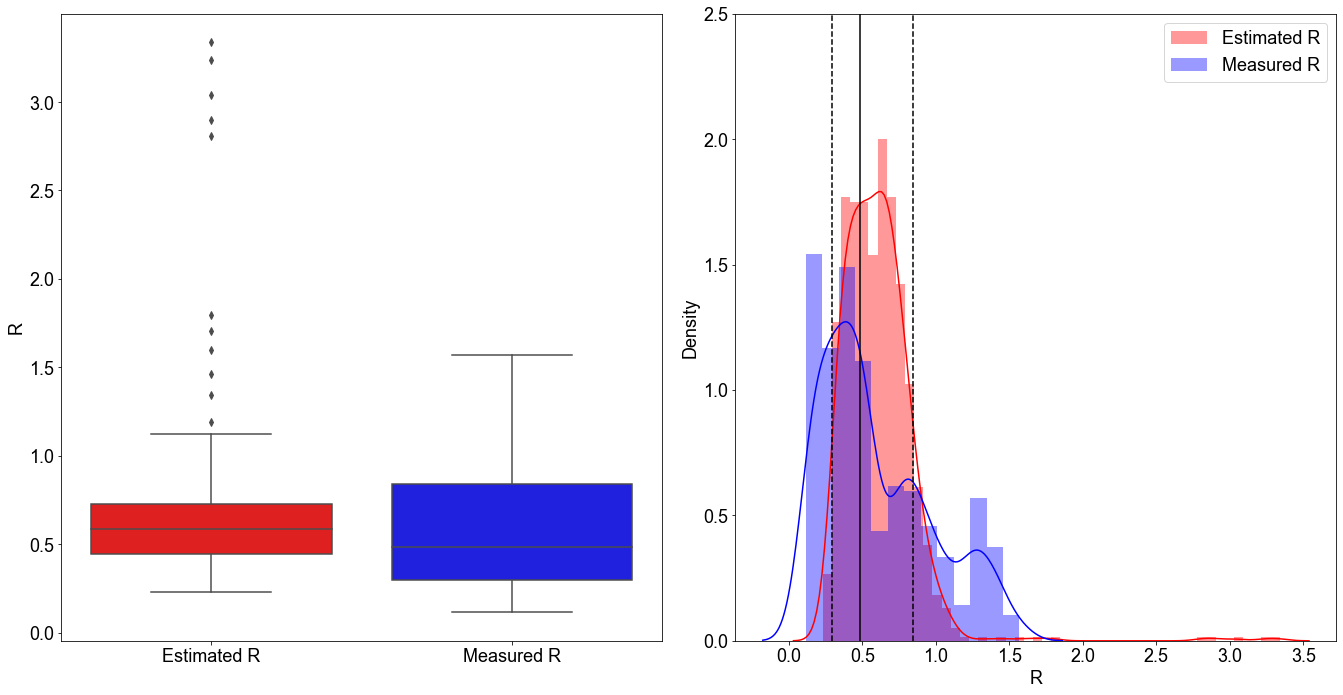

85.7% falls within measured IQR


In [10]:
# Test depth predictions using a separate monte carlo analysis

pq = 2650 # Density of quartz (used in Stock et al., 2008)
pf = 1000
g = 9.81

n = 1000
tc_ratio_samples = np.random.uniform(low=tc_ratio_25, high=tc_ratio_75, size=n)

fan_R = {} # Store things in a dictionary

def depth_reconstruct_25(row):
    tc_D50 = row['tc_slope']*tc_ratio_25
    Hbf = (tc_D50*(pq-pf)*row['D50']/1000)/(pf*row['Slope'])
    return Hbf

def depth_reconstruct_50(row):
    tc_D50 = row['tc_slope']*tc_ratio_median
    Hbf = (tc_D50*(pq-pf)*row['D50']/1000)/(pf*row['Slope'])
    return Hbf

def depth_reconstruct_75(row):
    tc_D50 = row['tc_slope']*tc_ratio_75
    Hbf = (tc_D50*(pq-pf)*row['D50']/1000)/(pf*row['Slope'])
    return Hbf

def depth_reconstruct_sample(row):
    tc_D50 = row['tc_slope']*row['tc_ratio']
    Hbf = (tc_D50*(pq-pf)*row['D50']/1000)/(pf*row['Slope'])
    return Hbf

# Low estimate 25th percentile
fan_dv_2016_tc_df_25 = fan_dv_2016_tc_df.copy()
fan_dv_2016_tc_df_50 = fan_dv_2016_tc_df.copy()
fan_dv_2016_tc_df_75 = fan_dv_2016_tc_df.copy()
fan_dv_2016_tc_df_25['estimated_R'] = fan_dv_2016_tc_df_25.apply(depth_reconstruct_25, axis=1)
fan_dv_2016_tc_df_50['estimated_R'] = fan_dv_2016_tc_df_50.apply(depth_reconstruct_50, axis=1)
fan_dv_2016_tc_df_75['estimated_R'] = fan_dv_2016_tc_df_75.apply(depth_reconstruct_75, axis=1)


# for fan in fan_dv_2016_tc_df.Fan.unique():
    
#     dat_25 = fan_dv_2016_tc_df_25.loc[fan_dv_2016_tc_df_25.Fan==fan].dropna(subset=['estimated_R'])
#     dat_50 = fan_dv_2016_tc_df_50.loc[fan_dv_2016_tc_df_50.Fan==fan].dropna(subset=['estimated_R'])
#     dat_75 = fan_dv_2016_tc_df_75.loc[fan_dv_2016_tc_df_75.Fan==fan].dropna(subset=['estimated_R'])
    
#     lower_bounds = dat_50['estimated_R'].values-dat_25['estimated_R'].values
#     upper_bounds = dat_75['estimated_R'].values-dat_50['estimated_R']
#     ax.errorbar(dat_50['R'], dat_50['estimated_R'].values, yerr=[lower_bounds, upper_bounds], fmt='o')
    
# ax.set_xlim([0, 1.6])
# ax.set_ylim([0, 1.6])
# plt.show()

R = []
R_type = []

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(19, 10))

for tc_ratio in tc_ratio_samples:
    row = fan_dv_2016_tc_df.sample()
    row['tc_ratio'] = tc_ratio
    row['estimated_R'] = row.apply(depth_reconstruct_sample, axis=1)
    R.append(row['estimated_R'].values[0])
    R.append(row['R'].values[0])
    R_type.append('Estimated R')
    R_type.append('Measured R')

df = pd.DataFrame({'R_type':R_type, 'R':R})
sns.boxplot(x="R_type", y="R", data=df, ax=ax[0], palette=['red', 'blue'])

ax[0].set_xlabel('')

measured_R = df.loc[df.R_type == 'Measured R']['R'].values
measured_median = np.nanmedian(measured_R)
measured_25 = np.nanpercentile(measured_R, 25)
measured_75 = np.nanpercentile(measured_R, 75)

estimated_R = df.loc[df.R_type == 'Estimated R']['R'].values

sns.distplot(estimated_R, ax=ax[1], label='Estimated R', color='red')
sns.distplot(measured_R, ax=ax[1], label='Measured R', color='blue')
ax[1].plot([measured_median,measured_median], [0, 2.5], 'k-')
ax[1].plot([measured_25,measured_25], [0, 2.5], 'k--')
ax[1].plot([measured_75,measured_75], [0, 2.5], 'k--')
ax[1].legend()
ax[1].set_xlabel('R')
ax[1].set_ylim([0, 2.5])
plt.tight_layout()
plt.show()
fig.savefig("figures/estimated_versus_measured_R.pdf")

within_IQR = np.logical_and(estimated_R>=measured_25, estimated_R<=measured_75)

print(str((np.sum(within_IQR)/len(within_IQR))*100)+'% falls within measured IQR')

In [11]:
# Load data
fan_dv_2016 = pd.read_csv('Death_Valley_Surfaces/Field_Width_Depth_Data_DV_2016.csv')
fan_stock_et_al = pd.read_csv('stock_et_al_2008_all_fans.csv')

# fan_dv_2016_Q4 = fan_dv_2016[fan_dv_2016.Surface == 'Q4']
# fan_dv_2016_Q4['Source'] = '2016 Field survey'
# fan_dv_2016_Q4['WD'] = fan_dv_2016_Q4['Wbf']/fan_dv_2016_Q4['Hbf']

HP_fan_data_stock = fan_stock_et_al[fan_stock_et_al.Location == 'Hanaupah']
GL_fan_data_stock = fan_stock_et_al[fan_stock_et_al.Location == 'Globe']
SC_fan_data_stock = fan_stock_et_al[fan_stock_et_al.Location == 'Sheep Creek']
LG_fan_data_stock = fan_stock_et_al[fan_stock_et_al.Location == 'Lucy Gray']

mojave_field_survey = fan_dv_2016[fan_dv_2016.Surface == 'Q4']
mojave_field_survey['Source'] = '2016 Field survey'
mojave_field_survey['WD'] = mojave_field_survey['Wbf']/mojave_field_survey['Hbf']

HP_stock_df = pd.DataFrame({
    'Wbf':HP_fan_data_stock['w_b (m)'],
    'Hbf':HP_fan_data_stock['h_b (m)'],
    'Slope':HP_fan_data_stock['Slope (50-m)'],})
HP_stock_df['Fan'] = 'HP'
HP_stock_df['Site'] = False
HP_stock_df['Surface'] = False
HP_stock_df['Source'] = 'Stock et al., 2008'
HP_stock_df['WD'] = HP_stock_df['Wbf']/HP_stock_df['Hbf']

mojave_field_survey = mojave_field_survey.append(HP_stock_df)

GL_stock_df = pd.DataFrame({
    'Wbf':GL_fan_data_stock['w_b (m)'],
    'Hbf':GL_fan_data_stock['h_b (m)'],
    'Slope':GL_fan_data_stock['Slope (50-m)'],})
GL_stock_df['Fan'] = 'GL'
GL_stock_df['Site'] = False
GL_stock_df['Surface'] = False
GL_stock_df['Source'] = 'Stock et al., 2008'
GL_stock_df['WD'] = GL_stock_df['Wbf']/GL_stock_df['Hbf']

mojave_field_survey = mojave_field_survey.append(GL_stock_df)

SC_stock_df = pd.DataFrame({
    'Wbf':SC_fan_data_stock['w_b (m)'],
    'Hbf':SC_fan_data_stock['h_b (m)'],
    'Slope':SC_fan_data_stock['Slope (50-m)'],})
SC_stock_df['Fan'] = 'SC'
SC_stock_df['Site'] = False
SC_stock_df['Surface'] = False
SC_stock_df['Source'] = 'Stock et al., 2008'
SC_stock_df['WD'] = SC_stock_df['Wbf']/SC_stock_df['Hbf']

mojave_field_survey = mojave_field_survey.append(SC_stock_df)

LG_stock_df = pd.DataFrame({
    'Wbf':LG_fan_data_stock['w_b (m)'],
    'Hbf':LG_fan_data_stock['h_b (m)'],
    'Slope':LG_fan_data_stock['Slope (50-m)'],})

LG_stock_df['Fan'] = 'LG'
LG_stock_df['Site'] = False
LG_stock_df['Surface'] = False
LG_stock_df['Source'] = 'Stock et al., 2008'
LG_stock_df['WD'] = LG_stock_df['Wbf']/LG_stock_df['Hbf']

mojave_field_survey = mojave_field_survey.append(LG_stock_df)
# mojave_field_survey = mojave_field_survey.dropna()


<ipython-input-11-c30bd006b3da>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mojave_field_survey['Source'] = '2016 Field survey'
<ipython-input-11-c30bd006b3da>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mojave_field_survey['WD'] = mojave_field_survey['Wbf']/mojave_field_survey['Hbf']


In [12]:
# Display field survey data
mojave_field_survey

Fan   Site   Wbf   Hbf     Slope Surface              Source         WD
0   GC    A-1  37.4  0.80  0.013964      Q4   2016 Field survey  46.750000
1   GC    B-1  10.0  0.40  0.103340      Q4   2016 Field survey  25.000000
2   HP    A-1  15.3  1.70  0.094528      Q4   2016 Field survey   9.000000
3   HP    B-1   6.7  0.40  0.096289      Q4   2016 Field survey  16.750000
4   HP    A-2  40.2   NaN  0.089248      Q4   2016 Field survey        NaN
..  ..    ...   ...   ...       ...     ...                 ...        ...
21  LG  False  23.6  0.55  0.036000   False  Stock et al., 2008  42.909091
22  LG  False  11.2  0.43  0.047000   False  Stock et al., 2008  26.046512
23  LG  False  17.6  0.38  0.036000   False  Stock et al., 2008  46.315789
24  LG  False  32.5  0.40  0.048000   False  Stock et al., 2008  81.250000
25  LG  False  36.7  0.51  0.044000   False  Stock et al., 2008  71.960784

[152 rows x 8 columns]

In [13]:
# Fan surface averages 
fan_surface_df = pd.read_csv('fan_surface_slope_gs.csv') # <-- DV_GSD_Dists.ipynb

fan_surface_df


fan surface  slope_25  slope_50  slope_75   D25   D50    D75    D90     n
0    HP      Q4  0.066420  0.075190  0.087489  27.0  51.0   79.0  115.1  2300
1    HP      Q3  0.072998  0.082215  0.088368  48.0  73.0  113.0  165.0  1898
2    HP      Q2  0.083094  0.087489  0.090127  29.0  49.0   76.0  110.0  1101
3    GC      Q4  0.059411  0.091007  0.101576  29.0  50.0   75.0  109.0  2903
4    GC      Q3  0.091007  0.103340  0.106869  45.0  71.0  110.0  158.0  2093
5    GC      Q2  0.082215  0.096289  0.103340  31.0  48.0   75.0  113.0  1501
6   SO1      Q4  0.085730  0.094528  0.098051  24.0  49.0   80.0  126.0  3099
7   SO1      Q3  0.089687  0.101577  0.108635  25.0  52.0   97.0  163.0  3206
8   SO1      Q2  0.105104  0.113936  0.126329  22.0  38.0   63.0   92.0  1514
9   SO2      Q4  0.061163  0.067297  0.069927  21.0  40.0   63.0   96.0  3026
10  SO2      Q3  0.070365  0.073436  0.083972  25.0  52.0   78.0  116.2  1000
11  SO2      Q2  0.080458  0.087489  0.092767  24.0  44.0   69.0  103.0  1723

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


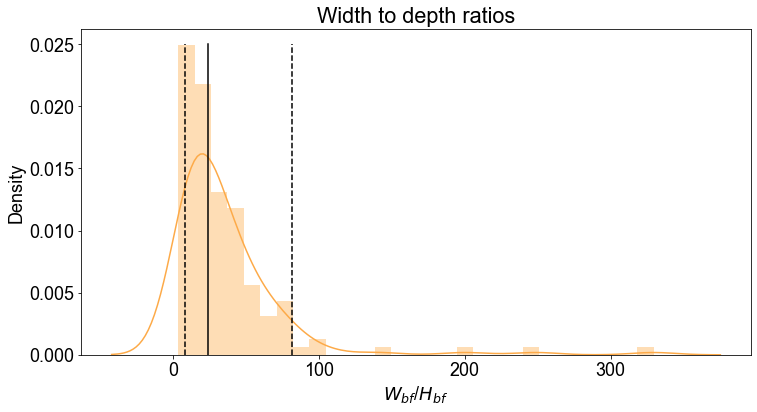

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.size': 18})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

dsp2 = sns.distplot(mojave_field_survey['WD'], hist=True, ax=ax, color=sns.xkcd_rgb['light orange'], label='Inactive')

pct_05 = mojave_field_survey['WD'].quantile(.05)
pct_95 = mojave_field_survey['WD'].quantile(.95)
pct_50 = mojave_field_survey['WD'].quantile(.5)

nan_elems = mojave_field_survey['WD'].isnull()
wd_data = mojave_field_survey['WD'][~nan_elems]

ax.set_title('Width to depth ratios')
ax.plot([pct_05, pct_05],[0, 0.025], 'k--');
ax.plot([pct_95, pct_95],[0, 0.025], 'k--');
ax.plot([pct_50, pct_50],[0, 0.025], 'k-');

ax.set_xlabel('$W_{bf}$/$H_{bf}$')
plt.show()
fig.savefig('figures/mojave_wd_ratios.pdf')


## Method

### Catchment-fan palaeohydraulics


Water discharge $Q$ can be calculated by:

\begin{equation}
    Q = UWH
\end{equation}

We know the modern width to depth ratios, but we don't know what palaeohydraulics existed on alluvial fan surface in the past.

However, we do know;
* Grain size
* Slope

Stock et al., (2008) observed that fan slope is not controlled by grain size but by bedload sediment flux. As such, we cannot use fan slope to estimate basal shear stress.




Using Froude number for estimating flow velocity ($Fr > 0.7$)

\begin{equation}
    U = Fr\sqrt{g H}
\end{equation}

### Ratios between surfaces


\begin{equation}
    \left( \frac{U_1}{U_2} \right) = \left(\frac{H_1}{H_2} \right)^{1/6} \left(\frac{D_{90{_2}}}{D_{90{_1}}} \right)^{1/6} \left( \frac{u^*_1}{u^*_2} \right)
\end{equation}

\begin{equation}
    \left( \frac{u^*_1}{u^*_2} \right) = \sqrt{\frac{H_1 S_1}{H_2 S_2}} 
\end{equation}

\begin{equation}
    \left( \frac{U,Hol}{U,Mod} \right) = \left(\frac{H,Hol}{H,Mod} \right)^{1/6} \left(\frac{D_{90},Mod}{D_{90},Hol} \right)^{1/6} \sqrt{\frac{[HS],Hol}{[HS],Mod}}
\end{equation}

\begin{equation}
    \left( \frac{Qw,Hol}{Qw,Mod} \right) = \frac{[UWH],Hol}{[UWH],Mod}
\end{equation}

\begin{equation}
    \left( \frac{Qw,Hol}{Qw,Mod} \right) = \frac{[U,Hol][W,Hol][H,Hol]}{[U,Mod][W,Mod][H,Mod]}
\end{equation}


In [15]:
ps = 1680
pq = 2650 # Density of quartzs (used in Stock et al., 2008)
pf = 1000
g = 9.81

def bed_shear_stress(row):
    return pf*g*row['S']*row['Hbf']

def depth_reconstruct(row):
    
    tc_D50 = row['tc']*row['tc_ratio']
    Hbf = (tc_D50*(pq-pf)*row['D50'])/(pf*row['S'])

    return Hbf

def estimate_tc(row):
    # Lamb et al., 2008
    
    #tau_m/tau_T = 40%
    
    P0 = -3.14
    P1 = 0.410
    P2 = 0.142
    P3 = 8.94e-2
    P4 = 2.59e-2
    
    X = 0.406*np.log(142*row['S'])
    
    return np.exp((P4*np.power(X,4))+(P3*np.power(X,3))+(P2*np.power(X,2))+(P1*X)+P0)

def froude_velocity(row):
    return row['froude']*np.sqrt(g*row['Hbf'])
    
surface_dfs = pd.DataFrame()

surfaces = ['Q4', 'Q3', 'Q2']
surfaces_alt = ['Q4', 'Q3b', 'Q2c']

n = 10000 # Monte Carlo iterations
 
fans = ['HP', 'GC', 'SO1', 'SO2']

froude_range = [0.7, 0.7]

wd_ratio_05 = mojave_field_survey['WD'].quantile(.05)
wd_ratio_95 = mojave_field_survey['WD'].quantile(.95)

for idx, fn in enumerate(fans):
    
#     field_data = fan_dv_2016_Q4[fan_dv_2016_Q4['Fan'] == fn]
#     widths = field_data['Wbf'] # 5th - 95th percentile
#     widths_05 = np.nanpercentile(widths, 5)
#     widths_95 = np.nanpercentile(widths, 95)

#     depths = field_data['Hbf'] # 5th - 95th percentile
#     depths_05 = np.nanpercentile(depths, 5)
#     depths_95 = np.nanpercentile(depths, 95)

    
    idxs = fan_surface_by_fan.groups[fn]
    fan_surfaces = fan_surface_df.loc[idxs]
        
    for sidx, s in enumerate(surfaces):
        
        # Grain size data
        gs_data = fan_surfaces.loc[fan_surfaces['surface']==s]

        D90 = gs_data.D90.iloc[0]
        D75 = gs_data.D75.iloc[0]
        D50 = gs_data.D50.iloc[0]
        D25 = gs_data.D25.iloc[0]
        slope = gs_data.slope_50.iloc[0]
        slope_25 = gs_data.slope_25.iloc[0]
        slope_75 = gs_data.slope_75.iloc[0]
        
        # Uniform distributions for width, slope and width-to-depth ratio
#         width_samples = np.random.uniform(low=widths_05, high=widths_95, size=n)
#         d50_samples = np.random.uniform(low=D25, high=D75, size=n)
        slope_samples = np.random.uniform(low=slope_25, high=slope_75, size=n)
#         depths_samples = np.random.uniform(low=depths_05, high=depths_95, size=n)
        wd_samples = np.random.uniform(low=wd_ratio_05, high=wd_ratio_95, size=n)
        froude_samples = np.random.uniform(low=froude_range[0], high=froude_range[1], size=n)
        tc_ratio_samples = np.random.uniform(low=tc_ratio_25, high=tc_ratio_75, size=n)
        
        # Create dataframe
        qms_df = pd.DataFrame({'S':slope_samples})
        qms_df['S'] = slope_samples
        qms_df['tc_ratio'] = tc_ratio_samples
        qms_df['tc'] = qms_df.apply(estimate_tc, axis=1)
        
#         qms_df['Wbf'] = width_samples
        qms_df['W/D'] = wd_samples
        qms_df['D50'] = D50/1000
        qms_df['D75'] = D75/1000
        qms_df['D90'] = D90/1000
        
        qms_df['Hbf'] = qms_df.apply(depth_reconstruct, axis=1) 
        
        qms_df['froude'] = froude_samples
        qms_df['tb'] = qms_df.apply(bed_shear_stress, axis=1) # Depth-slope product
        qms_df['W_est'] = qms_df['Hbf']*wd_samples # Estimated width using W/D
        qms_df['U_est_1'] = qms_df.apply(froude_velocity, axis=1)
        
        # Monte Carlo Discharge Estimate
        qms_df['Q_est_1'] = qms_df['U_est_1']*qms_df['W_est']*qms_df['Hbf'] # Water discharge using field-measured widths
        
#         qms_df['ks'] = 2*D90
#         qms_df['u*_r'] = np.sqrt(qms_df['tb']/pf)
#         qms_df['U_est_2'] = np.power(qms_df['Hbf']/qms_df['ks'], 1/6)*qms_df['u*_r'] # Velocity 
#         qms_df['Q_est_2'] = qms_df['U_est_2']*qms_df['W_est']*qms_df['Hbf'] # Water discharge using field-measured widths
        
        qms_df['Surface'] = s
        qms_df['Fan'] = fn
        
        surface_dfs = surface_dfs.append(qms_df)
        
surface_dfs


S   tc_ratio        tc        W/D    D50    D75     D90  \
0     0.080108   8.981323  0.083219  21.217717  0.051  0.079  0.1151   
1     0.066758   9.331238  0.077218  63.843731  0.051  0.079  0.1151   
2     0.079557   7.844375  0.082974  22.317171  0.051  0.079  0.1151   
3     0.078754   5.858272  0.082617  27.829988  0.051  0.079  0.1151   
4     0.081722  10.109065  0.083934  62.773848  0.051  0.079  0.1151   
...        ...        ...       ...        ...    ...    ...     ...   
9995  0.091873   9.692986  0.088387  69.872508  0.044  0.069  0.1030   
9996  0.088814   7.258987  0.087052  66.373702  0.044  0.069  0.1030   
9997  0.089682   5.877112  0.087431  51.050574  0.044  0.069  0.1030   
9998  0.087627   9.571948  0.086532  46.768327  0.044  0.069  0.1030   
9999  0.089741   6.624901  0.087457  10.817267  0.044  0.069  0.1030   

           Hbf  froude          tb      W_est   U_est_1     Q_est_1 Surface  \
0     0.785124     0.7  616.999610  16.658531  1.942681   25.408343      Q4   
1     0.908260     0.7  594.814612  57.986718  2.089477  110.046562      Q4   
2     0.688459     0.7  537.308422  15.364461  1.819163   19.242752      Q4   
3     0.517158     0.7  399.543927  14.392501  1.576682   11.735557      Q4   
4     0.873693     0.7  700.437978  54.845102  2.049331   98.199447      Q4   
...        ...     ...         ...        ...       ...         ...     ...   
9995  0.677012     0.7  610.170157  47.304502  1.803975   57.773575      Q2   
9996  0.516547     0.7  450.047663  34.285156  1.575751   27.906399      Q2   
9997  0.415969     0.7  365.962880  21.235456  1.414044   12.490666      Q2   
9998  0.686241     0.7  589.906939  32.094341  1.816230   40.001469      Q2   
9999  0.468726     0.7  412.648410   5.070336  1.501040    3.567370      Q2   

      Fan  
0      HP  
1      HP  
2      HP  
3      HP  
4      HP  
...   ...  
9995  SO2  
9996  SO2  
9997  SO2  
9998  SO2  
9999  SO2  

[120000 rows x 15 columns]

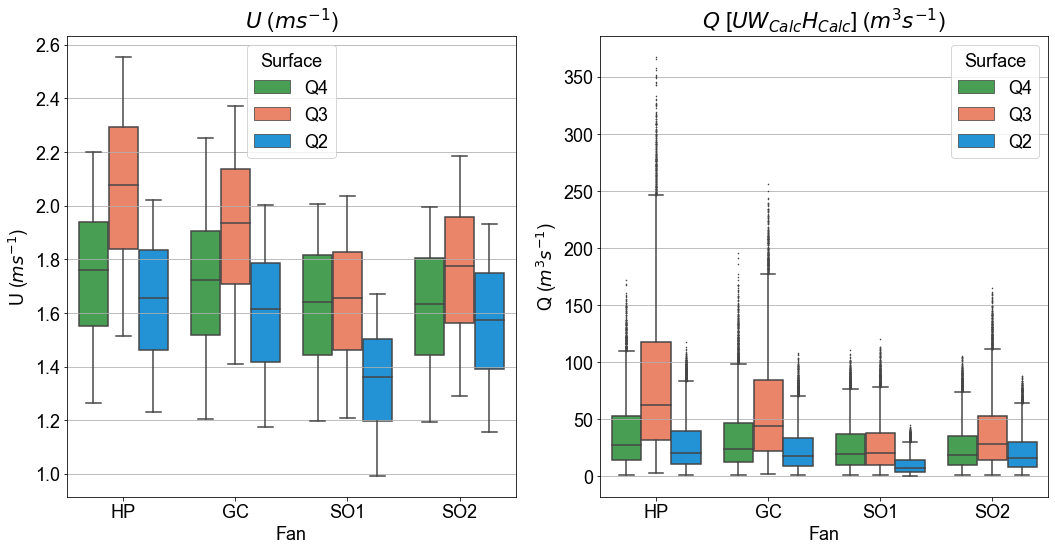

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="U_est_1", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[0])
ax[0].set_ylabel('U ($ms^{-1}$)')
# ax[0].set_ylim([0,3])
ax[0].set_title(r"$U$ ($ms^{-1}$)")
ax[0].grid(axis='y')

sns.boxplot(x="Fan", y="Q_est_1", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[1])
ax[1].set_ylabel('Q ($m^3s^{-1}$)')
# ax[1].set_ylim([0,3])
ax[1].set_title(r"$Q$ [$U W_{Calc} H_{Calc}$] ($m^3s^{-1}$) ")
ax[1].grid(axis='y')

plt.tight_layout()
fig.savefig("figures/velocity_water_discharge_estimations.pdf")
plt.show()
plt.close()


In [17]:
# Save Data to Pickle

with open('final_data/surface_dfs.pickle', 'wb') as handle:
    pickle.dump(surface_dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

    


Hbf min: 0.20502735875226488
Hbf max: 1.3583122434659982
Hbf median: 0.5872824017023011
Hbf p25: 0.4498041334286545
Hbf p75: 0.736523091260764
Hbf median: 0.5872824017023011
Hbf p25: 0.4498041334286545
Hbf p75: 0.736523091260764
Hbf Mean HP
Q4 0.6441681435358191
Q3 0.8980207348734887
Q2 0.5733796478356247
Hbf Median HP
Q4 0.6459509667342865
Q3 0.8987651331694493
Q2 0.5708544038805259
Hbf P90 HP


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Q4 0.8715538017267036
Q3 1.2107429821081495
Q2 0.7809674851415883
Hbf P25 HP
Q4 0.5006721575886404
Q3 0.7027967241225612
Q2 0.44529868031892894
Hbf P75 HP
Q4 0.7836252615398644
Q3 1.0930952880062035
Q2 0.6994823310904403
Hbf IQR
Q4 = (0.5006721575886404 - 0.7836252615398644)
Q3 = (0.7027967241225612 - 1.0930952880062035)
Q2 = (0.44529868031892894 - 0.6994823310904403)
Hbf Mean GC
Q4 0.6210519131153622
Q3 0.7780946089488204
Q2 0.5426850457765692
Hbf Median GC
Q4 0.6177132778526073
Q3 0.7790671464978838
Q2 0.542306696978728
Hbf P90 GC
Q4 0.8499871033216777
Q3 1.0528283542637875
Q2 0.7356204975312073
Hbf P25 GC
Q4 0.47847518736800704
Q3 0.6071199609805366
Q2 0.4186747398403609
Hbf P75 GC
Q4 0.7550975187616895
Q3 0.949677536214508
Q2 0.6626546688800725
Hbf IQR
Q4 = (0.47847518736800704 - 0.7550975187616895)
Q3 = (0.6071199609805366 - 0.949677536214508)
Q2 = (0.4186747398403609 - 0.6626546688800725)


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Hbf Mean SO1
Q4 0.5590314561630574
Q3 0.569657734118829
Q2 0.3839884882161954
Hbf Median SO1
Q4 0.5592794459785981
Q3 0.5698645071880857
Q2 0.3854435716716816
Hbf P90 SO1
Q4 0.7572754307452672
Q3 0.767383987088741
Q2 0.5192921293113142
Hbf P25 SO1
Q4 0.4327837036709873
Q3 0.4443158414100128
Q2 0.2973954123098683
Hbf P75 SO1
Q4 0.6861650777366592
Q3 0.6941868298935221
Q2 0.46931987983810725
Hbf IQR
Q4 = (0.4327837036709873 - 0.6861650777366592)
Q3 = (0.4443158414100128 - 0.6941868298935221)
Q2 = (0.2973954123098683 - 0.46931987983810725)
Hbf Mean SO2
Q4 0.5543001166038063
Q3 0.6538687884188604
Q2 0.5181553158531029
Hbf Median SO2
Q4 0.5549704945908743
Q3 0.6553188519470828
Q2 0.516494364012612
Hbf P90 SO2
Q4 0.7505955845027696
Q3 0.8845250260846415
Q2 0.7028458905282139
Hbf P25 SO2
Q4 0.43331704960630585
Q3 0.5081147368009882
Q2 0.4020919296461765
Hbf P75 SO2
Q4 0.6765338580315603
Q3 0.7978892959304925
Q2 0.635239323915754
Hbf IQR
Q4 = (0.43331704960630585 - 0.6765338580315603)
Q3 = (0.

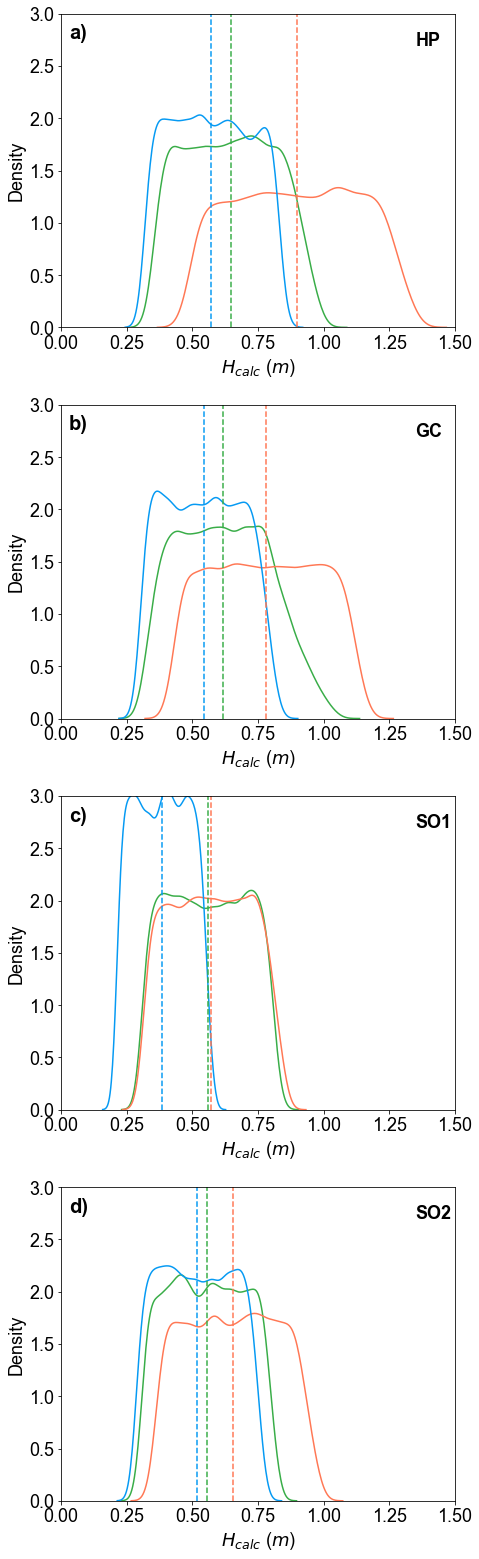

In [18]:
# Fan Calculated Depths

fans = surface_dfs.Fan.unique()

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(7,22))

fig_ids = ['a)', 'b)', 'c)', 'd)']

fan_H_metrics = {}

print('Hbf min: '+str(surface_dfs.Hbf.min()))
print('Hbf max: '+str(surface_dfs.Hbf.max()))

print('Hbf median: '+str(surface_dfs.Hbf.median()))
print('Hbf p25: '+str(np.percentile(surface_dfs.Hbf, 25)))
print('Hbf p75: '+str(np.percentile(surface_dfs.Hbf, 75)))

# Surface specific
print('Hbf median: '+str(surface_dfs.Hbf.median()))
print('Hbf p25: '+str(np.percentile(surface_dfs.Hbf, 25)))
print('Hbf p75: '+str(np.percentile(surface_dfs.Hbf, 75)))

for fidx, f in enumerate(fans):
    
    fan_H_metrics[f] = {}
    
    fan_dat = surface_dfs.loc[surface_dfs.Fan==f]
    
    # Velocity values
    Hbf = fan_dat.Hbf

    Q4_Hbf = fan_dat.loc[fan_dat.Surface=='Q4'].Hbf
    Q3_Hbf = fan_dat.loc[fan_dat.Surface=='Q3'].Hbf
    Q2_Hbf = fan_dat.loc[fan_dat.Surface=='Q2'].Hbf
    
    sns.distplot(Q4_Hbf, ax=ax[fidx], color=surface_palette[0], hist=False, label='Q4')
    
    sns.distplot(Q3_Hbf, ax=ax[fidx], color=surface_palette[1], hist=False, label='Q3')
    sns.distplot(Q2_Hbf, ax=ax[fidx], color=surface_palette[2], hist=False, label='Q2')
    ax[fidx].set_xlim([0,1.5])
    ax[fidx].set_ylim([0,3])
    ax[fidx].set_xlabel(r"$H_{calc}$ ($m$)")
    ax[fidx].text(0.9,0.9,f, transform=ax[fidx].transAxes, fontweight='bold')
    ax[fidx].text(0.02,0.92, fig_ids[fidx], transform=ax[fidx].transAxes, fontweight='bold', fontsize=20)
    
    print('Hbf Mean '+f)
    mean_H_Q4 = np.mean(Q4_Hbf)
    mean_H_Q3 = np.mean(Q3_Hbf)
    mean_H_Q2 = np.mean(Q2_Hbf)
    print('Q4 '+str(mean_H_Q4))
    print('Q3 '+str(mean_H_Q3))
    print('Q2 '+str(mean_H_Q2))

    fan_H_metrics[f]['mean'] = {}
    fan_H_metrics[f]['mean']['Q4'] = mean_H_Q4
    fan_H_metrics[f]['mean']['Q3'] = mean_H_Q3
    fan_H_metrics[f]['mean']['Q2'] = mean_H_Q2
    
    print('Hbf Median '+f)
    median_H_Q4 = np.median(Q4_Hbf)
    median_H_Q3 = np.median(Q3_Hbf)
    median_H_Q2 = np.median(Q2_Hbf)
    print('Q4 '+str(median_H_Q4))
    print('Q3 '+str(median_H_Q3))
    print('Q2 '+str(median_H_Q2))
    
    ax[fidx].plot([median_H_Q4, median_H_Q4], [0,3], '--', color=surface_palette[0])
    ax[fidx].plot([median_H_Q3, median_H_Q3], [0,3], '--', color=surface_palette[1])
    ax[fidx].plot([median_H_Q2, median_H_Q2], [0,3], '--', color=surface_palette[2])
    
    fan_H_metrics[f]['median'] = {}
    fan_H_metrics[f]['median']['Q4'] = median_H_Q4
    fan_H_metrics[f]['median']['Q3'] = median_H_Q3
    fan_H_metrics[f]['median']['Q2'] = median_H_Q2

    print('Hbf P90 '+f)
    p90_H_Q4 = np.percentile(Q4_Hbf, 90)
    p90_H_Q3 = np.percentile(Q3_Hbf, 90)
    p90_H_Q2 = np.percentile(Q2_Hbf, 90)
    print('Q4 '+str(p90_H_Q4))
    print('Q3 '+str(p90_H_Q3))
    print('Q2 '+str(p90_H_Q2))

    fan_H_metrics[f]['p90'] = {}
    fan_H_metrics[f]['p90']['Q4'] = p90_H_Q4
    fan_H_metrics[f]['p90']['Q3'] = p90_H_Q3
    fan_H_metrics[f]['p90']['Q2'] = p90_H_Q2

    print('Hbf P25 '+f)
    p25_H_Q4 = np.percentile(Q4_Hbf, 25)
    p25_H_Q3 = np.percentile(Q3_Hbf, 25)
    p25_H_Q2 = np.percentile(Q2_Hbf, 25)
    print('Q4 '+str(p25_H_Q4))
    print('Q3 '+str(p25_H_Q3))
    print('Q2 '+str(p25_H_Q2))

    fan_H_metrics[f]['p25'] = {}
    fan_H_metrics[f]['p25']['Q4'] = p25_H_Q4
    fan_H_metrics[f]['p25']['Q3'] = p25_H_Q3
    fan_H_metrics[f]['p25']['Q2'] = p25_H_Q2

    print('Hbf P75 '+f)
    p75_H_Q4 = np.percentile(Q4_Hbf, 75)
    p75_H_Q3 = np.percentile(Q3_Hbf, 75)
    p75_H_Q2 = np.percentile(Q2_Hbf, 75)
    print('Q4 '+str(p75_H_Q4))
    print('Q3 '+str(p75_H_Q3))
    print('Q2 '+str(p75_H_Q2))

    fan_H_metrics[f]['p75'] = {}
    fan_H_metrics[f]['p75']['Q4'] = p75_H_Q4
    fan_H_metrics[f]['p75']['Q3'] = p75_H_Q3
    fan_H_metrics[f]['p75']['Q2'] = p75_H_Q2
    
    print('Hbf IQR')
    print('Q4 = ('+str(fan_H_metrics[f]['p25']['Q4'])+' - '+str(fan_H_metrics[f]['p75']['Q4'])+')')
    print('Q3 = ('+str(fan_H_metrics[f]['p25']['Q3'])+' - '+str(fan_H_metrics[f]['p75']['Q3'])+')')
    print('Q2 = ('+str(fan_H_metrics[f]['p25']['Q2'])+' - '+str(fan_H_metrics[f]['p75']['Q2'])+')')
plt.tight_layout()
fig.savefig("figures/computed_hbf_distributions.pdf")
plt.show()



/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

U Mean HP
Q4 1.7442157910786151
Q3 2.0598920450578166
Q2 1.6458228064359588
U StdHP
Q4 0.2327297215963822
Q3 0.27118376273460254
Q2 0.21782084151046902
U Median HP
Q4 1.7621071766425032
Q3 2.0785269098704564
Q2 1.6565144199807815
U P10HP
Q4 1.411240591751274
Q3 1.66656981719578
Q2 1.333991195785867
U P90HP
Q4 2.0468199650797096
Q3 2.412451127072647
Q2 1.9375326071862662


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Q Mean HP
Q4 37.0051054716461
Q3 83.95297131296861
Q2 27.752426820437897
Q Std HP
Q4 30.07972478087389
Q3 67.61930989780375
Q2 22.475680703386974
Q Median HP
Q4 27.316073019577182
Q3 62.13573399478995
Q2 20.41519209065291
Q P10  HP
Q4 7.805742529186838
Q3 17.459591829530055
Q2 5.970852964971894
Q P90 HP
Q4 82.47223118351725
Q3 186.6458438684884
Q2 61.29972005536903
U Mean GC
Q4 1.7111646856076008
Q3 1.917378338344984
Q2 1.6009386440495699
U StdGC
Q4 0.2392694294799814
Q3 0.2527514261117265
Q2 0.21360759474352792
U Median GC
Q4 1.7231616160374528
Q3 1.935173859387323
Q2 1.6145631178774593
U P10GC
Q4 1.3764247820416298
Q3 1.5516593937533725
Q2 1.2971596358714046
U P90GC
Q4 2.0213369354677866
Q3 2.249631216877241
Q2 1.8804398872291277


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Q Mean GC
Q4 34.019644596382214
Q3 59.498439869718716
Q2 24.040444367770117
Q Std GC
Q4 29.2238614118109
Q3 48.30816145602806
Q2 19.64212637894457
Q Median GC
Q4 24.272046274980024
Q3 43.97100588819117
Q2 17.86955300045478
Q P10  GC
Q4 6.734546194416285
Q3 12.311378993783357
Q2 4.928731112549254
Q P90 GC
Q4 75.35785270894937
Q3 132.8429754507765
Q2 53.47231232623574
U Mean SO1
Q4 1.6249481262541068
Q3 1.6406687367736446
Q2 1.3468613736446673
U StdSO1
Q4 0.216221862015543
Q3 0.21562434535407235
Q2 0.1782097196856257
U Median SO1
Q4 1.6396342180098524
Q3 1.6550775509066278
Q2 1.361171812232549
U P10SO1
Q4 1.3153253482763279
Q3 1.330101081288507
Q2 1.091282493081866
U P90SO1
Q4 1.907916997074563
Q3 1.9206087802989424
Q2 1.5799320668544674


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Q Mean SO1
Q4 25.982936787874518
Q3 26.895946072524506
Q2 10.166337142822861
Q Std SO1
Q4 21.023271106474187
Q3 21.786802717961315
Q2 8.245766054190561
Q Median SO1
Q4 19.18949361412497
Q3 20.12027724400582
Q2 7.535169234498458
Q P10  SO1
Q4 5.413227240953906
Q3 5.742562484946549
Q2 2.065883370267654
Q P90 SO1
Q4 58.44057192681084
Q3 60.147437386349175
Q2 22.592205955187087
U Mean SO2
Q4 1.6183712081272181
Q3 1.7575263647563653
Q2 1.5644664558965062
U StdSO2
Q4 0.21293159278905555
Q3 0.2327723270427458
Q2 0.20776307696244986
U Median SO2
Q4 1.63330574875472
Q3 1.7748386375631608
Q2 1.575670256828698
U P10SO2
Q4 1.312176965090741
Q3 1.4216138089612267
Q2 1.2678801594747433
U P90SO2
Q4 1.8994835916952804
Q3 2.061994991971994
Q2 1.8380723356370998


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Q Mean SO2
Q4 25.123968595734652
Q3 37.82976577061142
Q2 21.290450077536605
Q Std SO2
Q4 20.320723321741873
Q3 30.47117403197524
Q2 17.288569562110464
Q Median SO2
Q4 18.59357922780245
Q3 28.168765378285656
Q2 15.592782113155035
Q P10  SO2
Q4 5.350939167307538
Q3 8.052361515319589
Q2 4.397266603639089
Q P90 SO2
Q4 55.96189775170278
Q3 83.31869649185053
Q2 48.054430322967384


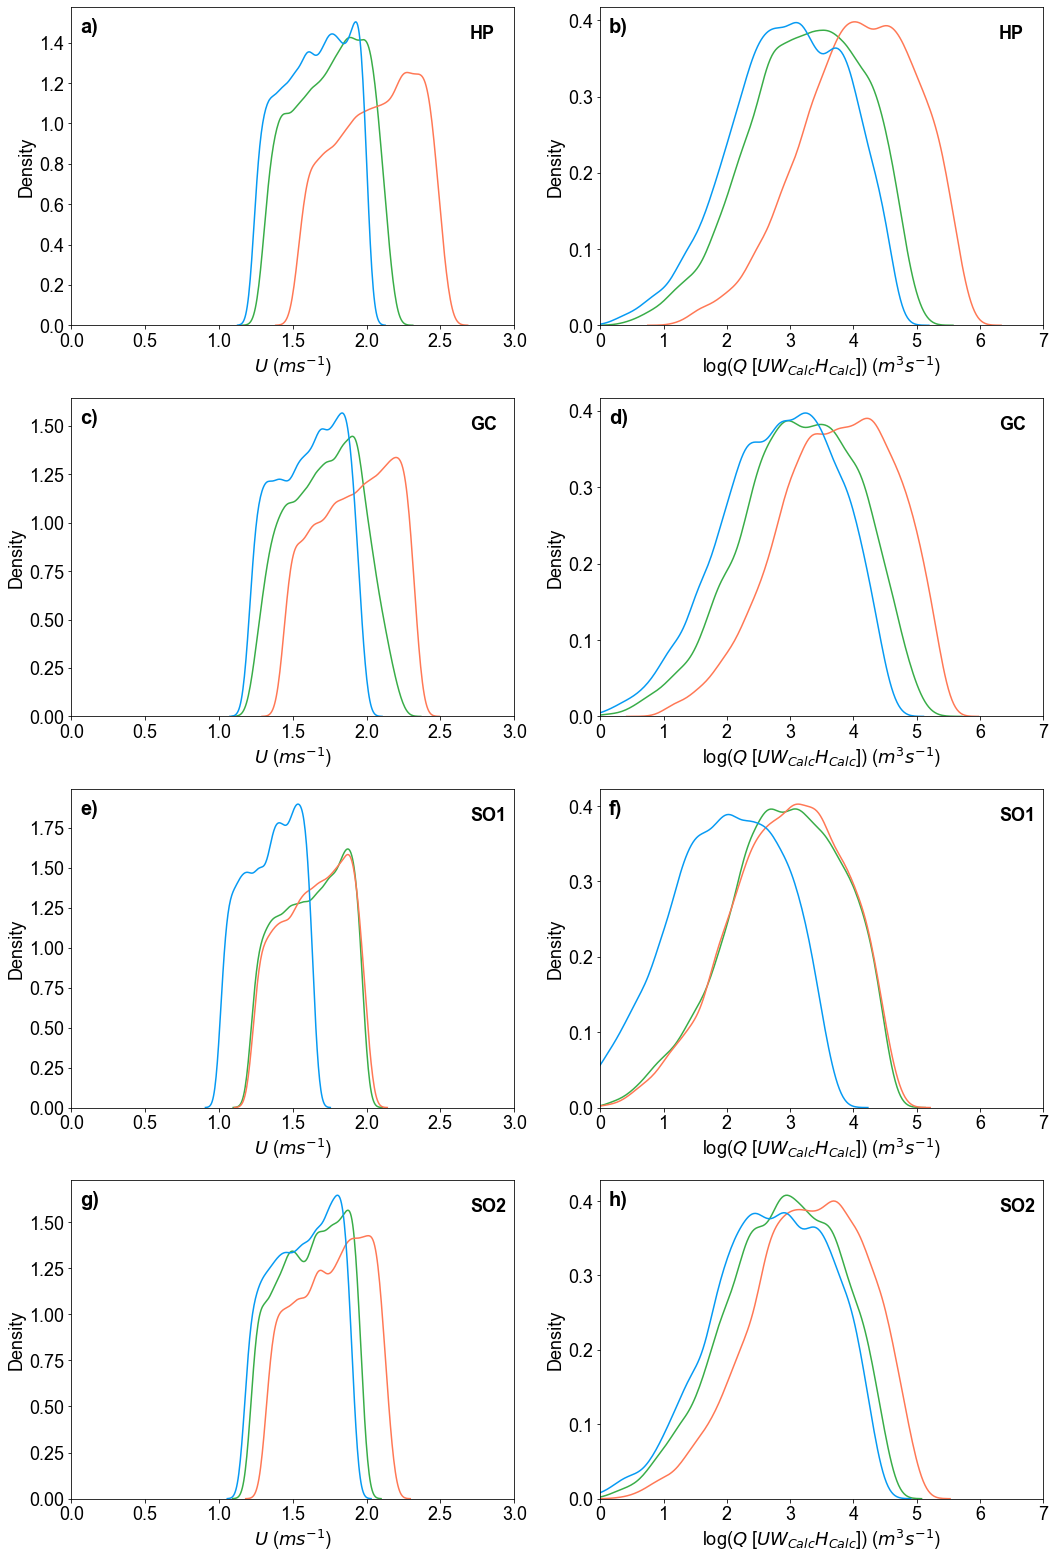

In [19]:
fans = surface_dfs.Fan.unique()

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,22))

fig_ids = [['a)', 'b)'], ['c)', 'd)'], ['e)', 'f)'], ['g)', 'h)']]

fan_Q_metrics = {}
fan_U_metrics = {}

for fidx, f in enumerate(fans):
    
    fan_Q_metrics[f] = {}
    fan_U_metrics[f] = {}
    
    fan_dat = surface_dfs.loc[surface_dfs.Fan==f]
    
    # Velocity values
    U = fan_dat.U_est_1

    Q4_velocity = fan_dat.loc[fan_dat.Surface=='Q4'].U_est_1
    Q3_velocity = fan_dat.loc[fan_dat.Surface=='Q3'].U_est_1
    Q2_velocity = fan_dat.loc[fan_dat.Surface=='Q2'].U_est_1
    
    sns.distplot(Q4_velocity, ax=ax[fidx][0], color=surface_palette[0], hist=False, label='Q4')
    sns.distplot(Q3_velocity, ax=ax[fidx][0], color=surface_palette[1], hist=False, label='Q3')
    sns.distplot(Q2_velocity, ax=ax[fidx][0], color=surface_palette[2], hist=False, label='Q2')
    ax[fidx][0].set_xlim([0,3])
    ax[fidx][0].set_xlabel(r"$U$ ($ms^{-1}$)")
    ax[fidx][0].text(0.9,0.9,f, transform=ax[fidx][0].transAxes, fontweight='bold')
    ax[fidx][0].text(0.02,0.92, fig_ids[fidx][0], transform=ax[fidx][0].transAxes, fontweight='bold', fontsize=20)
    
    print('U Mean '+f)
    mean_U_Q4 = np.mean(Q4_velocity)
    mean_U_Q3 = np.mean(Q3_velocity)
    mean_U_Q2 = np.mean(Q2_velocity)
    print('Q4 '+str(mean_U_Q4))
    print('Q3 '+str(mean_U_Q3))
    print('Q2 '+str(mean_U_Q2))

    fan_U_metrics[f]['mean'] = {}
    fan_U_metrics[f]['mean']['Q4'] = mean_U_Q4
    fan_U_metrics[f]['mean']['Q3'] = mean_U_Q3
    fan_U_metrics[f]['mean']['Q2'] = mean_U_Q2
    
    print('U Std'+f)
    std_U_Q4 = np.std(Q4_velocity)
    std_U_Q3 = np.std(Q3_velocity)
    std_U_Q2 = np.std(Q2_velocity)
    print('Q4 '+str(std_U_Q4))
    print('Q3 '+str(std_U_Q3))
    print('Q2 '+str(std_U_Q2))

    fan_U_metrics[f]['std'] = {}
    fan_U_metrics[f]['std']['Q4'] = std_U_Q4
    fan_U_metrics[f]['std']['Q3'] = std_U_Q3
    fan_U_metrics[f]['std']['Q2'] = std_U_Q2
    
    print('U Median '+f)
    median_U_Q4 = np.median(Q4_velocity)
    median_U_Q3 = np.median(Q3_velocity)
    median_U_Q2 = np.median(Q2_velocity)
    print('Q4 '+str(median_U_Q4))
    print('Q3 '+str(median_U_Q3))
    print('Q2 '+str(median_U_Q2))
 
    fan_U_metrics[f]['median'] = {}
    fan_U_metrics[f]['median']['Q4'] = median_U_Q4
    fan_U_metrics[f]['median']['Q3'] = median_U_Q3
    fan_U_metrics[f]['median']['Q2'] = median_U_Q2
    
    print('U P10'+f)
    p10_U_Q4 = np.percentile(Q4_velocity, 10)
    p10_U_Q3 = np.percentile(Q3_velocity, 10)
    p10_U_Q2 = np.percentile(Q2_velocity, 10)
    print('Q4 '+str(p10_U_Q4))
    print('Q3 '+str(p10_U_Q3))
    print('Q2 '+str(p10_U_Q2))

    fan_U_metrics[f]['p10'] = {}
    fan_U_metrics[f]['p10']['Q4'] = p10_U_Q4
    fan_U_metrics[f]['p10']['Q3'] = p10_U_Q3
    fan_U_metrics[f]['p10']['Q2'] = p10_U_Q2
    
    print('U P90'+f)
    p90_U_Q4 = np.percentile(Q4_velocity, 90)
    p90_U_Q3 = np.percentile(Q3_velocity, 90)
    p90_U_Q2 = np.percentile(Q2_velocity, 90)
    print('Q4 '+str(p90_U_Q4))
    print('Q3 '+str(p90_U_Q3))
    print('Q2 '+str(p90_U_Q2))

    fan_U_metrics[f]['p90'] = {}
    fan_U_metrics[f]['p90']['Q4'] = p90_U_Q4
    fan_U_metrics[f]['p90']['Q3'] = p90_U_Q3
    fan_U_metrics[f]['p90']['Q2'] = p90_U_Q2
    
    # Discharge values
    Q = fan_dat.Q_est_1
    
    Q4_discharge = fan_dat.loc[fan_dat.Surface=='Q4'].Q_est_1
    Q3_discharge = fan_dat.loc[fan_dat.Surface=='Q3'].Q_est_1
    Q2_discharge = fan_dat.loc[fan_dat.Surface=='Q2'].Q_est_1
                          
    sns.distplot(np.log(Q4_discharge), ax=ax[fidx][1], color=surface_palette[0], hist=False, label='Q4')
    sns.distplot(np.log(Q3_discharge), ax=ax[fidx][1], color=surface_palette[1], hist=False, label='Q3')
    sns.distplot(np.log(Q2_discharge), ax=ax[fidx][1], color=surface_palette[2], hist=False, label='Q2')
    ax[fidx][1].set_xlim([0,7])
    ax[fidx][1].set_xlabel(r"log($Q$ [$U W_{Calc} H_{Calc}$]) ($m^3s^{-1}$) ")
    ax[fidx][1].text(0.9,0.9, f, transform=ax[fidx][1].transAxes, fontweight='bold')
    ax[fidx][1].text(0.02,0.92, fig_ids[fidx][1], transform=ax[fidx][1].transAxes, fontweight='bold', fontsize=20)
    
    print('Q Mean '+f)
    mean_Q_Q4 = np.mean(Q4_discharge)
    mean_Q_Q3 = np.mean(Q3_discharge)
    mean_Q_Q2 = np.mean(Q2_discharge)
    print('Q4 '+str(mean_Q_Q4))
    print('Q3 '+str(mean_Q_Q3))
    print('Q2 '+str(mean_Q_Q2))
    
    fan_Q_metrics[f]['mean'] = {}
    fan_Q_metrics[f]['mean']['Q4'] = mean_Q_Q4
    fan_Q_metrics[f]['mean']['Q3'] = mean_Q_Q3
    fan_Q_metrics[f]['mean']['Q2'] = mean_Q_Q2
    
    print('Q Std '+f)
    std_Q_Q4 = np.std(Q4_discharge)
    std_Q_Q3 = np.std(Q3_discharge)
    std_Q_Q2 = np.std(Q2_discharge)
    print('Q4 '+str(std_Q_Q4))
    print('Q3 '+str(std_Q_Q3))
    print('Q2 '+str(std_Q_Q2))

    fan_Q_metrics[f]['std'] = {}
    fan_Q_metrics[f]['std']['Q4'] = std_Q_Q4
    fan_Q_metrics[f]['std']['Q3'] = std_Q_Q3
    fan_Q_metrics[f]['std']['Q2'] = std_Q_Q2

    print('Q Median '+f)
    median_Q_Q4 = np.median(Q4_discharge)
    median_Q_Q3 = np.median(Q3_discharge)
    median_Q_Q2 = np.median(Q2_discharge)
    print('Q4 '+str(median_Q_Q4))
    print('Q3 '+str(median_Q_Q3))
    print('Q2 '+str(median_Q_Q2))

    fan_Q_metrics[f]['median'] = {}
    fan_Q_metrics[f]['median']['Q4'] = median_Q_Q4
    fan_Q_metrics[f]['median']['Q3'] = median_Q_Q3
    fan_Q_metrics[f]['median']['Q2'] = median_Q_Q2
    
    print('Q P10  '+f)
    p10_Q_Q4 = np.percentile(Q4_discharge, 10)
    p10_Q_Q3 = np.percentile(Q3_discharge, 10)
    p10_Q_Q2 = np.percentile(Q2_discharge, 10)
    print('Q4 '+str(p10_Q_Q4))
    print('Q3 '+str(p10_Q_Q3))
    print('Q2 '+str(p10_Q_Q2))

    fan_Q_metrics[f]['p10'] = {}
    fan_Q_metrics[f]['p10']['Q4'] = p10_Q_Q4
    fan_Q_metrics[f]['p10']['Q3'] = p10_Q_Q3
    fan_Q_metrics[f]['p10']['Q2'] = p10_Q_Q2
    
    print('Q P90 '+f)
    p90_Q_Q4 = np.percentile(Q4_discharge, 90)
    p90_Q_Q3 = np.percentile(Q3_discharge, 90)
    p90_Q_Q2 = np.percentile(Q2_discharge, 90)
    print('Q4 '+str(p90_Q_Q4))
    print('Q3 '+str(p90_Q_Q3))
    print('Q2 '+str(p90_Q_Q2))

    fan_Q_metrics[f]['p90'] = {}
    fan_Q_metrics[f]['p90']['Q4'] = p90_Q_Q4
    fan_Q_metrics[f]['p90']['Q3'] = p90_Q_Q3
    fan_Q_metrics[f]['p90']['Q2'] = p90_Q_Q2
    
plt.tight_layout()
fig.savefig("figures/velocity_water_discharge_distributions.pdf")
plt.show()


In [20]:
# Averages for each metric


# Velocity

average_Q4_U_median = np.mean([fan_U_metrics['HP']['median']['Q4'], 
                              fan_U_metrics['GC']['median']['Q4'],
                              fan_U_metrics['SO1']['median']['Q4'],
                              fan_U_metrics['SO2']['median']['Q4']])

average_Q3_U_median = np.mean([fan_U_metrics['HP']['median']['Q3'], 
                              fan_U_metrics['GC']['median']['Q3'],
                              fan_U_metrics['SO1']['median']['Q3'],
                              fan_U_metrics['SO2']['median']['Q3']])

average_Q2_U_median = np.mean([fan_U_metrics['HP']['median']['Q2'], 
                              fan_U_metrics['GC']['median']['Q2'],
                              fan_U_metrics['SO1']['median']['Q2'],
                              fan_U_metrics['SO2']['median']['Q2']])

# Discharge
average_Q4_Q_median = np.mean([fan_Q_metrics['HP']['median']['Q4'], 
                              fan_Q_metrics['GC']['median']['Q4'],
                              fan_Q_metrics['SO1']['median']['Q4'],
                              fan_Q_metrics['SO2']['median']['Q4']])

average_Q3_Q_median = np.mean([fan_Q_metrics['HP']['median']['Q3'], 
                              fan_Q_metrics['GC']['median']['Q3'],
                              fan_Q_metrics['SO1']['median']['Q3'],
                              fan_Q_metrics['SO2']['median']['Q3']])

average_Q2_Q_median = np.mean([fan_Q_metrics['HP']['median']['Q2'], 
                              fan_Q_metrics['GC']['median']['Q2'],
                              fan_Q_metrics['SO1']['median']['Q2'],
                              fan_Q_metrics['SO2']['median']['Q2']])

# Discharge
average_Q4_Q_p90 = np.mean([fan_Q_metrics['HP']['p90']['Q4'], 
                              fan_Q_metrics['GC']['p90']['Q4'],
                              fan_Q_metrics['SO1']['p90']['Q4'],
                              fan_Q_metrics['SO2']['p90']['Q4']])

average_Q3_Q_p90 = np.mean([fan_Q_metrics['HP']['p90']['Q3'], 
                              fan_Q_metrics['GC']['p90']['Q3'],
                              fan_Q_metrics['SO1']['p90']['Q3'],
                              fan_Q_metrics['SO2']['p90']['Q3']])

average_Q2_Q_p90 = np.mean([fan_Q_metrics['HP']['p90']['Q2'], 
                              fan_Q_metrics['GC']['p90']['Q2'],
                              fan_Q_metrics['SO1']['p90']['Q2'],
                              fan_Q_metrics['SO2']['p90']['Q2']])

print("Average Q4 Median Velocity:")
print(average_Q4_U_median)
print("Average Q3_Median Velocity:")
print(average_Q3_U_median)
print("Average Q2 Median Velocity:")
print(average_Q2_U_median)
print('')
print("Average Q4 Median Discharge:")
print(average_Q4_Q_median)
print("Average Q3_Median Discharge:")
print(average_Q3_Q_median)
print("Average Q2 Median Discharge:")
print(average_Q2_Q_median)
print('')
print("Average Q4 P90 Discharge:")
print(average_Q4_Q_p90)
print("Average Q3 P90 Discharge:")
print(average_Q3_Q_p90)
print("Average Q2 P90 Discharge:")
print(average_Q2_Q_p90)

Average Q4 Median Velocity:
1.689552189861132
Average Q3_Median Velocity:
1.8609042394318918
Average Q2 Median Velocity:
1.5519799017298719

Average Q4 Median Discharge:
22.342798034121156
Average Q3_Median Discharge:
38.59894562631815
Average Q2 Median Discharge:
15.353174109690297

Average Q4 P90 Discharge:
68.05813839274506
Average Q3 P90 Discharge:
115.73873829936615
Average Q2 P90 Discharge:
46.35466716493981


In [21]:
# Relative changes in Q

print("MEDIAN Q")
HP_Q3_Q4_Q_ratio = fan_Q_metrics['HP']['median']['Q3']/fan_Q_metrics['HP']['median']['Q4']
print('HP Q3 is '+str(round(HP_Q3_Q4_Q_ratio,2))+'x greater than Q4')
HP_Q2_Q4_Q_ratio = fan_Q_metrics['HP']['median']['Q2']/fan_Q_metrics['HP']['median']['Q4']
print('HP Q2 is '+str(round(HP_Q2_Q4_Q_ratio,2))+'x greater than Q4')

GC_Q3_Q4_Q_ratio = fan_Q_metrics['GC']['median']['Q3']/fan_Q_metrics['GC']['median']['Q4']
print('GC Q3 is '+str(round(GC_Q3_Q4_Q_ratio,2))+'x greater than Q4')
GC_Q2_Q4_Q_ratio = fan_Q_metrics['GC']['median']['Q2']/fan_Q_metrics['GC']['median']['Q4']
print('GC Q2 is '+str(round(GC_Q2_Q4_Q_ratio,2))+'x greater than Q4')


SO1_Q3_Q4_Q_ratio = fan_Q_metrics['SO1']['median']['Q3']/fan_Q_metrics['SO1']['median']['Q4']
print('SO1 Q3 is '+str(round(SO1_Q3_Q4_Q_ratio,2))+'x greater than Q4')
SO1_Q2_Q4_Q_ratio = fan_Q_metrics['SO1']['median']['Q2']/fan_Q_metrics['SO1']['median']['Q4']
print('SO1 Q2 is '+str(round(SO1_Q2_Q4_Q_ratio,2))+'x greater than Q4')


SO2_Q3_Q4_Q_ratio = fan_Q_metrics['SO2']['median']['Q3']/fan_Q_metrics['SO2']['median']['Q4']
print('SO2 Q3 is '+str(round(SO2_Q3_Q4_Q_ratio,2))+'x greater than Q4')
SO2_Q2_Q4_Q_ratio = fan_Q_metrics['SO2']['median']['Q2']/fan_Q_metrics['SO2']['median']['Q4']
print('SO2 Q2 is '+str(round(SO2_Q2_Q4_Q_ratio,2))+'x greater than Q4')

print("Average D50 change in Q3/Q4")
print(np.mean([HP_Q3_Q4_Q_ratio, GC_Q3_Q4_Q_ratio, SO1_Q3_Q4_Q_ratio, SO2_Q3_Q4_Q_ratio]))
print("Average D50 change in Q2/Q4")
print(np.mean([HP_Q2_Q4_Q_ratio, GC_Q2_Q4_Q_ratio, SO1_Q2_Q4_Q_ratio, SO2_Q2_Q4_Q_ratio]))

print('')
print("P10 Q")
HP_Q3_Q4_Q_ratio_P10 = fan_Q_metrics['HP']['p10']['Q3']/fan_Q_metrics['HP']['p10']['Q4']
print('HP Q3 is '+str(round(HP_Q3_Q4_Q_ratio_P10,2))+'x greater than Q4')
HP_Q2_Q4_Q_ratio_P10 = fan_Q_metrics['HP']['p10']['Q2']/fan_Q_metrics['HP']['p10']['Q4']
print('HP Q2 is '+str(round(HP_Q2_Q4_Q_ratio_P10,2))+'x greater than Q4')

GC_Q3_Q4_Q_ratio_P10 = fan_Q_metrics['GC']['p10']['Q3']/fan_Q_metrics['GC']['p10']['Q4']
print('GC Q3 is '+str(round(GC_Q3_Q4_Q_ratio_P10,2))+'x greater than Q4')
GC_Q2_Q4_Q_ratio_P10 = fan_Q_metrics['GC']['p10']['Q2']/fan_Q_metrics['GC']['p10']['Q4']
print('GC Q2 is '+str(round(GC_Q2_Q4_Q_ratio_P10,2))+'x greater than Q4')


SO1_Q3_Q4_Q_ratio_P10 = fan_Q_metrics['SO1']['p10']['Q3']/fan_Q_metrics['SO1']['p10']['Q4']
print('SO1 Q3 is '+str(round(SO1_Q3_Q4_Q_ratio_P10,2))+'x greater than Q4')
SO1_Q2_Q4_Q_ratio_P10 = fan_Q_metrics['SO1']['p10']['Q2']/fan_Q_metrics['SO1']['p10']['Q4']
print('SO1 Q2 is '+str(round(SO1_Q2_Q4_Q_ratio_P10,2))+'x greater than Q4')


SO2_Q3_Q4_Q_ratio_P10 = fan_Q_metrics['SO2']['p10']['Q3']/fan_Q_metrics['SO2']['p10']['Q4']
print('SO2 Q3 is '+str(round(SO2_Q3_Q4_Q_ratio_P10,2))+'x greater than Q4')
SO2_Q2_Q4_Q_ratio_P10 = fan_Q_metrics['SO2']['p10']['Q2']/fan_Q_metrics['SO2']['p10']['Q4']
print('SO2 Q2 is '+str(round(SO2_Q2_Q4_Q_ratio_P10,2))+'x greater than Q4')

print("Average P10 change in Q3/Q4")
print(np.mean([HP_Q3_Q4_Q_ratio_P10, GC_Q3_Q4_Q_ratio_P10, SO1_Q3_Q4_Q_ratio_P10, SO2_Q3_Q4_Q_ratio_P10]))
print("Average P10 change in Q2/Q4")
print(np.mean([HP_Q2_Q4_Q_ratio_P10, GC_Q2_Q4_Q_ratio_P10, SO1_Q2_Q4_Q_ratio_P10, SO2_Q2_Q4_Q_ratio_P10]))


print('')
print("P90 Q")
HP_Q3_Q4_Q_ratio_P90 = fan_Q_metrics['HP']['p90']['Q3']/fan_Q_metrics['HP']['p90']['Q4']
print('HP Q3 is '+str(round(HP_Q3_Q4_Q_ratio_P90,2))+'x greater than Q4')
HP_Q2_Q4_Q_ratio_P90 = fan_Q_metrics['HP']['p90']['Q2']/fan_Q_metrics['HP']['p90']['Q4']
print('HP Q2 is '+str(round(HP_Q2_Q4_Q_ratio_P90,2))+'x greater than Q4')

GC_Q3_Q4_Q_ratio_P90 = fan_Q_metrics['GC']['p90']['Q3']/fan_Q_metrics['GC']['p90']['Q4']
print('GC Q3 is '+str(round(GC_Q3_Q4_Q_ratio_P90,2))+'x greater than Q4')
GC_Q2_Q4_Q_ratio_P90 = fan_Q_metrics['GC']['p90']['Q2']/fan_Q_metrics['GC']['p90']['Q4']
print('GC Q2 is '+str(round(GC_Q2_Q4_Q_ratio_P90,2))+'x greater than Q4')


SO1_Q3_Q4_Q_ratio_P90 = fan_Q_metrics['SO1']['p90']['Q3']/fan_Q_metrics['SO1']['p90']['Q4']
print('SO1 Q3 is '+str(round(SO1_Q3_Q4_Q_ratio_P90,2))+'x greater than Q4')
SO1_Q2_Q4_Q_ratio_P90 = fan_Q_metrics['SO1']['p90']['Q2']/fan_Q_metrics['SO1']['p90']['Q4']
print('SO1 Q2 is '+str(round(SO1_Q2_Q4_Q_ratio_P90,2))+'x greater than Q4')


SO2_Q3_Q4_Q_ratio_P90 = fan_Q_metrics['SO2']['p90']['Q3']/fan_Q_metrics['SO2']['p90']['Q4']
print('SO2 Q3 is '+str(round(SO2_Q3_Q4_Q_ratio_P90,2))+'x greater than Q4')
SO2_Q2_Q4_Q_ratio_P90 = fan_Q_metrics['SO2']['p90']['Q2']/fan_Q_metrics['SO2']['p90']['Q4']
print('SO2 Q2 is '+str(round(SO2_Q2_Q4_Q_ratio_P90,2))+'x greater than Q4')

print("Average P90 change in Q3/Q4")
print(np.mean([HP_Q3_Q4_Q_ratio_P90, GC_Q3_Q4_Q_ratio_P90, SO1_Q3_Q4_Q_ratio_P90, SO2_Q3_Q4_Q_ratio_P90]))
print("Average P90 change in Q2/Q4")
print(np.mean([HP_Q2_Q4_Q_ratio_P90, GC_Q2_Q4_Q_ratio_P90, SO1_Q2_Q4_Q_ratio_P90, SO2_Q2_Q4_Q_ratio_P90]))



MEDIAN Q
HP Q3 is 2.27x greater than Q4
HP Q2 is 0.75x greater than Q4
GC Q3 is 1.81x greater than Q4
GC Q2 is 0.74x greater than Q4
SO1 Q3 is 1.05x greater than Q4
SO1 Q2 is 0.39x greater than Q4
SO2 Q3 is 1.51x greater than Q4
SO2 Q2 is 0.84x greater than Q4
Average D50 change in Q3/Q4
1.6624407371887675
Average D50 change in Q2/Q4
0.6787178496099391

P10 Q
HP Q3 is 2.24x greater than Q4
HP Q2 is 0.76x greater than Q4
GC Q3 is 1.83x greater than Q4
GC Q2 is 0.73x greater than Q4
SO1 Q3 is 1.06x greater than Q4
SO1 Q2 is 0.38x greater than Q4
SO2 Q3 is 1.5x greater than Q4
SO2 Q2 is 0.82x greater than Q4
Average P10 change in Q3/Q4
1.6576362261072837
Average P10 change in Q2/Q4
0.675049916468335

P90 Q
HP Q3 is 2.26x greater than Q4
HP Q2 is 0.74x greater than Q4
GC Q3 is 1.76x greater than Q4
GC Q2 is 0.71x greater than Q4
SO1 Q3 is 1.03x greater than Q4
SO1 Q2 is 0.39x greater than Q4
SO2 Q3 is 1.49x greater than Q4
SO2 Q2 is 0.86x greater than Q4
Average P90 change in Q3/Q4
1.63600

In [22]:

print("MEDIAN U")
HP_Q3_Q4_U_ratio = fan_U_metrics['HP']['median']['Q3']/fan_U_metrics['HP']['median']['Q4']
print('HP Q3 is '+str(round(HP_Q3_Q4_U_ratio,2))+'x greater than Q4')
HP_Q2_Q4_U_ratio = fan_U_metrics['HP']['median']['Q2']/fan_U_metrics['HP']['median']['Q4']
print('HP Q2 is '+str(round(HP_Q2_Q4_U_ratio,2))+'x greater than Q4')

GC_Q3_Q4_U_ratio = fan_U_metrics['GC']['median']['Q3']/fan_U_metrics['GC']['median']['Q4']
print('GC Q3 is '+str(round(GC_Q3_Q4_U_ratio,2))+'x greater than Q4')
GC_Q2_Q4_U_ratio = fan_U_metrics['GC']['median']['Q2']/fan_U_metrics['GC']['median']['Q4']
print('GC Q2 is '+str(round(GC_Q2_Q4_U_ratio,2))+'x greater than Q4')


SO1_Q3_Q4_U_ratio = fan_U_metrics['SO1']['median']['Q3']/fan_U_metrics['SO1']['median']['Q4']
print('SO1 Q3 is '+str(round(SO1_Q3_Q4_U_ratio,2))+'x greater than Q4')
SO1_Q2_Q4_U_ratio = fan_U_metrics['SO1']['median']['Q2']/fan_U_metrics['SO1']['median']['Q4']
print('SO1 Q2 is '+str(round(SO1_Q2_Q4_U_ratio,2))+'x greater than Q4')


SO2_Q3_Q4_U_ratio = fan_U_metrics['SO2']['median']['Q3']/fan_U_metrics['SO2']['median']['Q4']
print('SO2 Q3 is '+str(round(SO2_Q3_Q4_U_ratio,2))+'x greater than Q4')
SO2_Q2_Q4_U_ratio = fan_U_metrics['SO2']['median']['Q2']/fan_U_metrics['SO2']['median']['Q4']
print('SO2 Q2 is '+str(round(SO2_Q2_Q4_U_ratio,2))+'x greater than Q4')

print("Average D50 change in Q3/Q4")
print(np.mean([HP_Q3_Q4_U_ratio, GC_Q3_Q4_U_ratio, SO1_Q3_Q4_U_ratio, SO2_Q3_Q4_U_ratio]))
print("Average D50 change in Q2/Q4")
print(np.mean([HP_Q2_Q4_U_ratio, GC_Q2_Q4_U_ratio, SO1_Q2_Q4_U_ratio, SO2_Q2_Q4_U_ratio]))


MEDIAN U
HP Q3 is 1.18x greater than Q4
HP Q2 is 0.94x greater than Q4
GC Q3 is 1.12x greater than Q4
GC Q2 is 0.94x greater than Q4
SO1 Q3 is 1.01x greater than Q4
SO1 Q2 is 0.83x greater than Q4
SO2 Q3 is 1.09x greater than Q4
SO2 Q2 is 0.96x greater than Q4
Average D50 change in Q3/Q4
1.0996696851649053
Average D50 change in Q2/Q4
0.9179833458045532


ValueError: Could not interpret input 'ks'

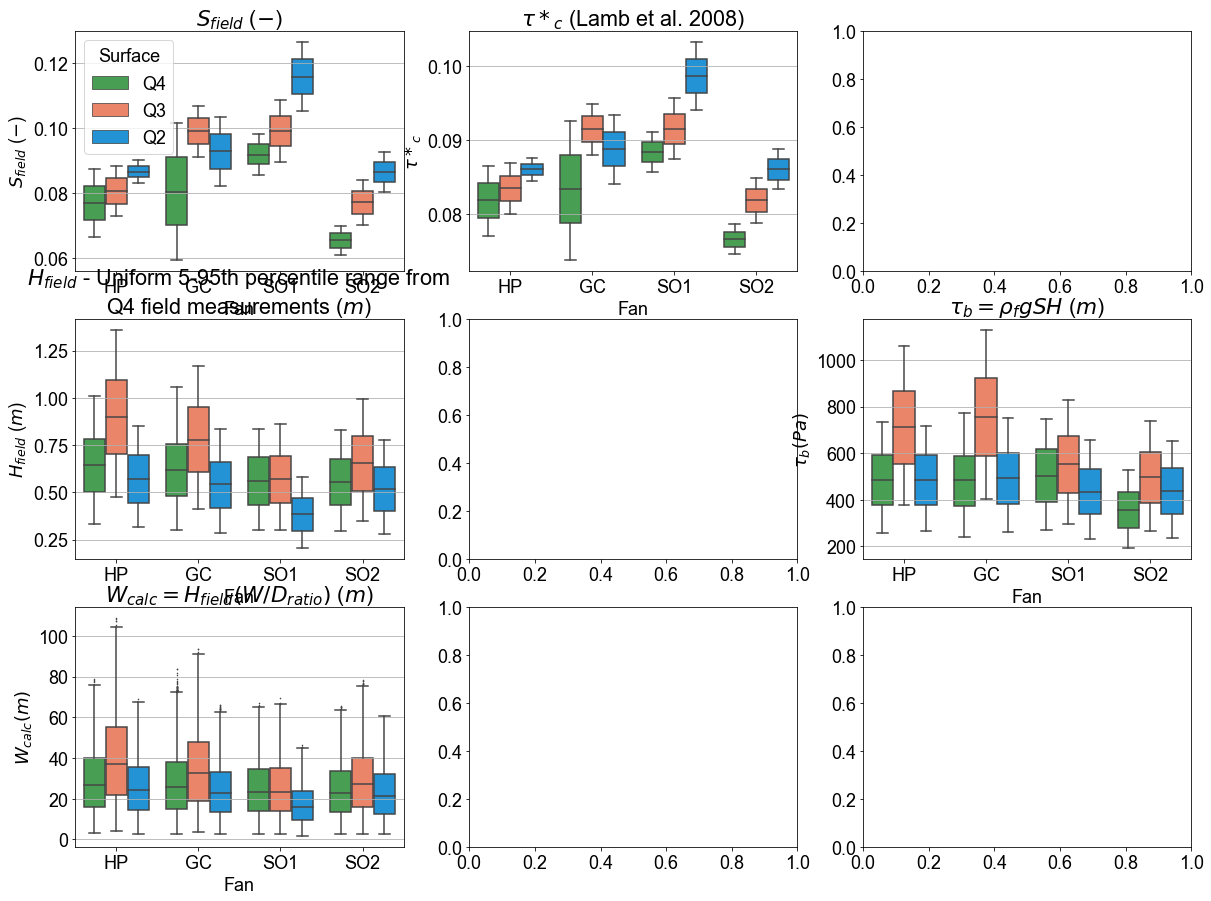

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="S", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[0][0])
ax[0][0].set_ylabel(r"$S_{field}$ ($-$)")
# ax.set_ylim([0,3])
ax[0][0].set_title(r'$S_{field}$ ($-$)')
ax[0][0].grid(axis='y')

surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="tc", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[0][1])
ax[0][1].set_ylabel(r"$\tau*_c$")
# ax.set_ylim([0,3])
ax[0][1].set_title(r"$\tau*_c$"+" (Lamb et al. 2008)")
ax[0][1].grid(axis='y')
ax[0][1].legend_.remove()

# surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
# sns.boxplot(x="Fan", y="tb", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[0][2])
# ax[0][2].set_ylabel(r"$\tau_b$ ($Pa$)")
# # ax.set_ylim([0,3])
# ax[0][2].set_title(r'$\tau_b$ (From $D_{50}$ and estimated $t_c$)')
# ax[0][2].grid(axis='y')
# ax[0][2].legend_.remove()

surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="Hbf", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[1][0])
ax[1][0].set_ylabel(r"$H_{field}$ ($m$)")
# ax[1][0].set_ylim([0,60])
ax[1][0].set_title(r"$H_{field}$"+" - Uniform 5-95th percentile range from \nQ4 field measurements ($m$)")
ax[1][0].grid(axis='y')
ax[1][0].legend_.remove()

surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="tb", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[1][2])
ax[1][2].set_ylabel(r"$\tau_b (Pa)$")
# ax.set_ylim([0,3])
ax[1][2].set_title(r"$\tau_b = \rho_fgSH$ ($m$)")
ax[1][2].grid(axis='y')
ax[1][2].legend_.remove()

surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="W_est", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[2][0])
ax[2][0].set_ylabel(r"$W_{calc} (m)$")
# ax[1][2].set_ylim([0,35])
ax[2][0].set_title(r"$W_{calc} = H_{field}(W/D_{ratio})$ ($m$)")
ax[2][0].grid(axis='y')
ax[2][0].legend_.remove()

surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="ks", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[2][1])
ax[2][1].set_ylabel(r"$ks$")
ax[2][1].set_title(r"$k = 2D_{90}$")
ax[2][1].grid(axis='y')
ax[2][1].legend_.remove()

surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="W/D", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[2][2])
ax[2][2].set_ylabel(r"$W/D$")
# ax.set_ylim([0,3])
ax[2][2].set_title(r"$W/D ratio $")
ax[2][2].grid(axis='y')
ax[2][2].legend_.remove()

# surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
# sns.boxplot(x="Fan", y="U", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[2][2])
# ax[2][2].set_ylabel(r"$U$ $(ms^{-1})$")
# ax[2][2].set_title(r"$U = C_f u_* $ ($ms^{-1}$)")

# # ax.set_ylim([0,3])
# ax[2][2].grid(axis='y')
# ax[2][2].legend_.remove()

plt.tight_layout()
fig.savefig("figures/depth_scaled_hydraulic_calcs.pdf")
plt.show()
plt.close()


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="u*_r", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[0])
ax[0].set_ylabel(r"$u*$ ($-$)")
# ax.set_ylim([0,3])
ax[0].set_title(r'$u*$')
ax[0].grid(axis='y')

sns.boxplot(x="Fan", y="U_est_1", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[1])
ax[1].set_ylabel(r"$U$ ($ms^-1$)")
# ax.set_ylim([0,3])
ax[1].set_title(r'$U$ ($ms^-1$)')
ax[1].grid(axis='y')

plt.show()

In [ ]:

ratio_dfs_est2 = pd.DataFrame(columns=['Fan', 'Q_ratio'])

# Width/Depth Ratio

for idx, fn in enumerate(field_widths):

    Mod = surface_dfs[(surface_dfs['Fan'] == fn) & (surface_dfs['Surface'] == 'Q4')]
    mid_H = surface_dfs[(surface_dfs['Fan'] == fn) & (surface_dfs['Surface'] == 'Q3')]
    late_P = surface_dfs[(surface_dfs['Fan'] == fn) & (surface_dfs['Surface'] == 'Q2')]

    H_Mod_mid_H = mid_H['Hbf']/Mod['Hbf']
    H_Mod_late_P = late_P['Hbf']/Mod['Hbf']
    
    U_Mod_mid_H = np.power(mid_H['Hbf']/Mod['Hbf'], 1/6)*np.power(Mod['D90']/mid_H['D90'], 1/6)*np.sqrt((mid_H['Hbf']*mid_H['S'])/(Mod['Hbf']*Mod['S']))
    U_Mod_late_P = np.power(mid_H['Hbf']/Mod['Hbf'], 1/6)*np.power(Mod['D90']/late_P['D90'], 1/6)*np.sqrt((late_P['Hbf']*late_P['S'])/(Mod['Hbf']*Mod['S']))
    
    Q_Mod_mid_H = U_Mod_mid_H*(mid_H['W_est']/Mod['W_est'])*(mid_H['Hbf']/Mod['Hbf'])
    Q_Mod_late_P = U_Mod_late_P*(late_P['W_est']/Mod['W_est'])*(late_P['Hbf']/Mod['Hbf'])
    
    r_df = pd.DataFrame({'H_ratio': H_Mod_mid_H, 'Q_ratio': U_Mod_mid_H, 'U_ratio': U_Mod_mid_H, 'ratio_type':'Ho/Mo (Q3/Q4)'})
    r_df['Fan'] = fn
    ratio_dfs_est2 = ratio_dfs_est2.append(r_df)
 
    r_df = pd.DataFrame({'H_ratio': H_Mod_late_P, 'Q_ratio': U_Mod_late_P, 'U_ratio': U_Mod_late_P, 'ratio_type':'Pl/Mo (Q2/Q4)'})
    r_df['Fan'] = fn
    ratio_dfs_est2 = ratio_dfs_est2.append(r_df)

    
ratio_dfs_est2.to_csv('ratio_data/depth_scaled_ratio_dfs_est2.csv')


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))

surface_palette = [sns.xkcd_rgb['pastel purple'], sns.xkcd_rgb['silver']]
sns.boxplot(x="Fan", y="U_ratio", hue="ratio_type", data=ratio_dfs_est2, 
            palette=surface_palette, fliersize=0.7, ax=ax, showfliers=False)
ax.set_ylabel('$U_1/U_2$')
ax.set_title('$U_1/U_2$')
ax.grid(axis='y')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
sns.boxplot(x="Fan", y="Q_ratio", hue="ratio_type", data=ratio_dfs_est2, 
            palette=surface_palette, fliersize=0.7, ax=ax, showfliers=False)
ax.set_ylabel('$Q_1/Q_2$')
ax.set_ylim([0,3])
ax.set_title('$Q_1/Q_2$ ($W_{calc}$)')
ax.grid(axis='y')

plt.tight_layout()
fig.savefig("figures/depth_scaled_velocity_discharge_ratios.pdf")
plt.show()
plt.close()


In [ ]:

ylims_H_ratio = {
    'HP':(0.4,2.5),
    'GC':(0.4,2),
    'SO1':(0.4,2),
    'SO2':(0.4,2)
}

ylims_Q_ratio = {
    'HP':(0,11),
    'GC':(0,7),
    'SO1':(0,7),
    'SO2':(0,7)
}

ylims_U_ratio = {
    'HP':(0.6,1.5),
    'GC':(0.6,1.5),
    'SO1':(0.6,1.5),
    'SO2':(0.6,1.5)
}

for f in fans:
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,7))
    ratio_dfs_est2_fan = ratio_dfs_est2[ratio_dfs_est2['Fan'] == f]
    
    surface_palette = [sns.xkcd_rgb['pastel purple'], sns.xkcd_rgb['silver']]
    sns.boxplot(x="Fan", y="H_ratio", hue="ratio_type", data=ratio_dfs_est2_fan, 
                palette=surface_palette, fliersize=0.7, ax=ax[0], showfliers=False)
    ax[0].set_ylabel('$H_1/H_2$')
    ax[0].set_title('$H_1/H_2$')
    ax[0].grid(axis='y')
#     ax[0].set_ylim(ylims_H_ratio[f])
    ax[0].legend_.remove()
    
    
    sns.boxplot(x="Fan", y="U_ratio", hue="ratio_type", data=ratio_dfs_est2_fan, 
                palette=surface_palette, fliersize=0.7, ax=ax[1], showfliers=False)
    ax[1].set_ylabel('$U_1/U_2$')
    ax[1].set_title('$U_1/U_2$')
    ax[1].grid(axis='y')
#     ax[1].set_ylim(ylims_U_ratio[f])
    ax[1].legend_.remove()
    
    sns.boxplot(x="Fan", y="Q_ratio", hue="ratio_type", data=ratio_dfs_est2_fan, 
                palette=surface_palette, fliersize=0.7, ax=ax[2], showfliers=False)
    ax[2].set_ylabel('$Q_1/Q_2$')
#     ax[2].set_ylim(ylims_Q_ratio[f])
    ax[2].set_title('$Q_1/Q_2$ ($W_{calc}$)')
    ax[2].grid(axis='y')
    
    plt.tight_layout()
    ax[2].legend_.remove()

    fig.savefig("figures/depth_scaled_velocity_discharge_ratios_"+f+".pdf")
    plt.show()
    plt.close()
